# COMP47490 Assignment 2

#### Student No: 19396951

The objective of the first question is to use the ensemble learning functionality to identify
the extent to which classification performance can be improved through the combination
of multiple models. Experiments will be run on a dataset extracted from US Census data.
The data contains 14 attributes including age, race, sex, marital status etc, and the goal is
to predict whether the individual earns over $50k per year.

In [97]:
#importing packages
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
import seaborn as sns
# to make the plots display inline 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# importing models from sklearn
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import plot_confusion_matrix, balanced_accuracy_score, accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

# Question 1

### (a) Data Cleaning

In [2]:
# Reading from a csv file, into a data frame
df = pd.read_csv("census_19396951.csv", skipinitialspace = True)
df.head()

age workclass  fnlwgt education  education-num      marital-status  \
0   47   Private  239865   HS-grad              9  Married-civ-spouse   
1   44   Private  179136   HS-grad              9       Never-married   
2   31   Private   32550      10th              6            Divorced   
3   18   Private   41381   HS-grad              9       Never-married   
4   17   Private   51939      11th              7       Never-married   

          occupation   relationship   race     sex  capital-gain  \
0       Craft-repair        Husband  White    Male             0   
1              Sales  Not-in-family  White  Female             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3              Sales      Own-child  White  Female             0   
4              Sales      Own-child  White  Female             0   

   capital-loss  hours-per-week native-country Income-category  
0          1977              45  United-States            >50K  
1             0              40  United-States           <=50K  
2             0              40  United-States           <=50K  
3          1602              20  United-States           <=50K  
4             0              15  United-States           <=50K

In [3]:
df.shape

(10000, 15)

There are 10000 observations within this dataset. 14 predictor features and 1 target feature.



In [4]:
#checking data types for each column
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
Income-category    object
dtype: object

In [5]:
#printing descriptive statistics for numerical features
df.describe().T

count         mean            std      min        25%  \
age             10000.0      38.5623      13.582870     17.0      28.00   
fnlwgt          10000.0  190889.7048  105115.513283  13769.0  118715.75   
education-num   10000.0      10.0882       2.577806      1.0       9.00   
capital-gain    10000.0    1089.0254    7416.891830      0.0       0.00   
capital-loss    10000.0      86.7716     399.361907      0.0       0.00   
hours-per-week  10000.0      40.4521      12.305196      1.0      40.00   

                     50%        75%        max  
age                 37.0      48.00       90.0  
fnlwgt          179609.5  238812.25  1268339.0  
education-num       10.0      12.00       16.0  
capital-gain         0.0       0.00    99999.0  
capital-loss         0.0       0.00     2824.0  
hours-per-week      40.0      45.00       99.0

From above using the function `describe().T` we can assume that there are no missing values in the features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              10000 non-null  int64 
 1   workclass        10000 non-null  object
 2   fnlwgt           10000 non-null  int64 
 3   education        10000 non-null  object
 4   education-num    10000 non-null  int64 
 5   marital-status   10000 non-null  object
 6   occupation       10000 non-null  object
 7   relationship     10000 non-null  object
 8   race             10000 non-null  object
 9   sex              10000 non-null  object
 10  capital-gain     10000 non-null  int64 
 11  capital-loss     10000 non-null  int64 
 12  hours-per-week   10000 non-null  int64 
 13  native-country   10000 non-null  object
 14  Income-category  10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


Information About the Dataset
- Age: Describes the age of individuals. Continuous.
- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Number of years spent in education. Continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Continuous.
- capital-loss: Continuous.
- hours-per-week: Continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [7]:
# Check columns
dfT = df.T  # transpose dataframe and perform same check as done for rows
dfT[dfT.duplicated(keep=False)]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 10000 columns]

It appears that there are no duplicate rows

In [8]:
df.nunique()

age                  71
workclass             9
fnlwgt             8500
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain         98
capital-loss         67
hours-per-week       85
native-country       41
Income-category       2
dtype: int64

All columns have cardinality > 1, hence there are no constant columns in the dataset.

In [9]:
params = {'axes.titlesize':'20',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)

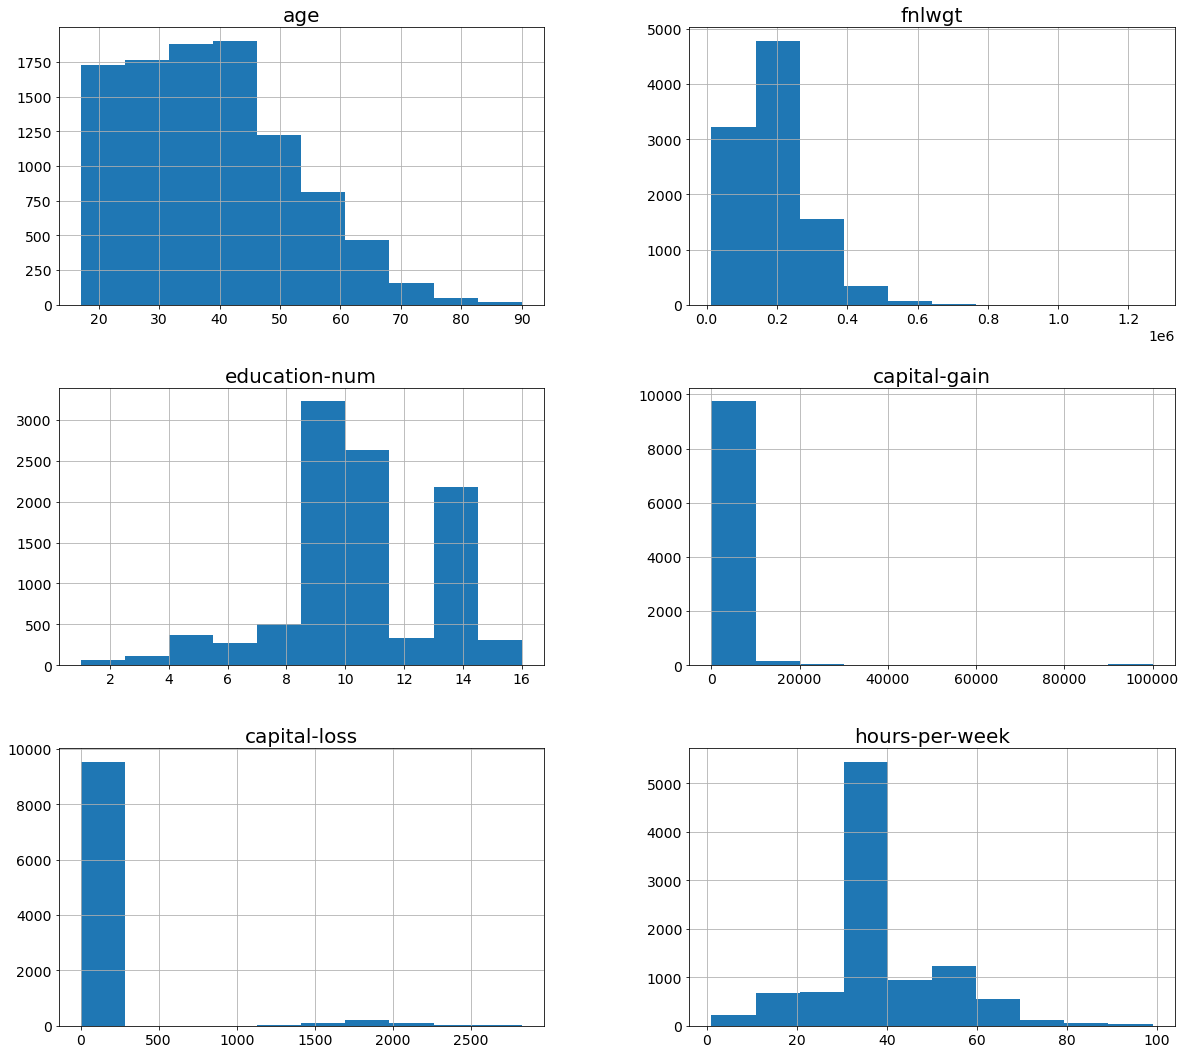

In [10]:
# add semicolon at the end of the code to avoid displaying matplotlib objects
# df.hist plots the distribution of the numerical features 
df.hist(figsize=(20, 25), layout=(4,2));
plt.grid(b=True, which='major', color='#666666', linestyle='-')

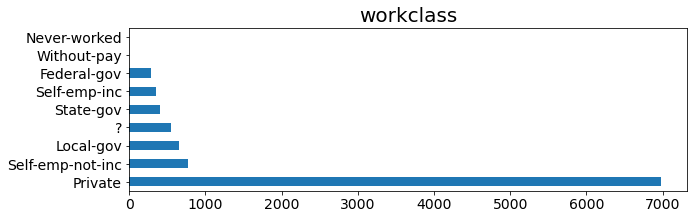

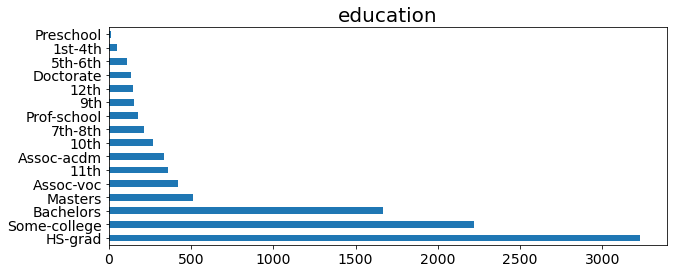

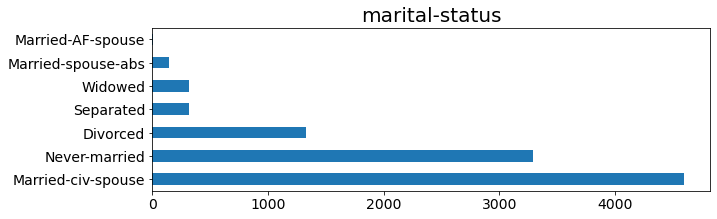

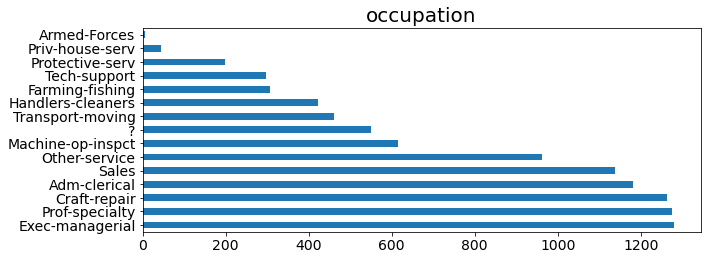

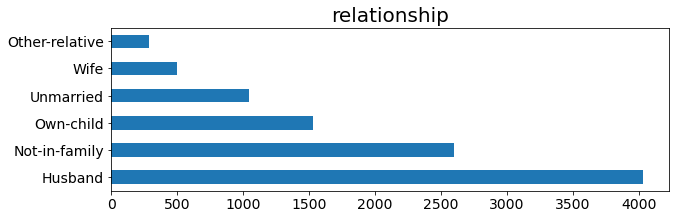

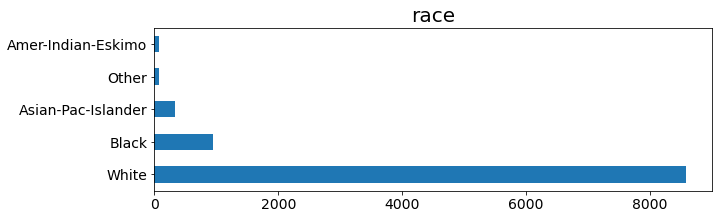

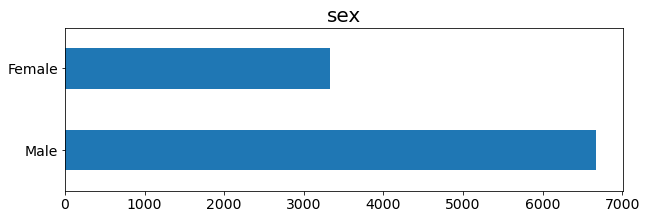

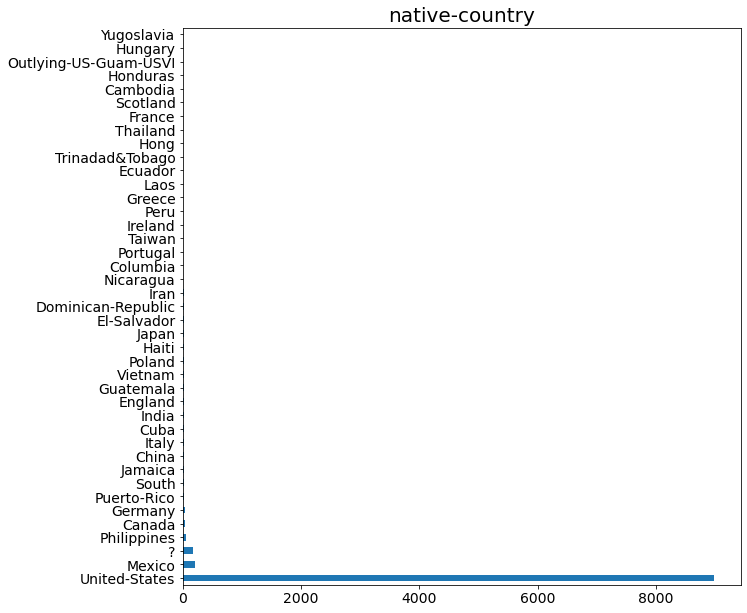

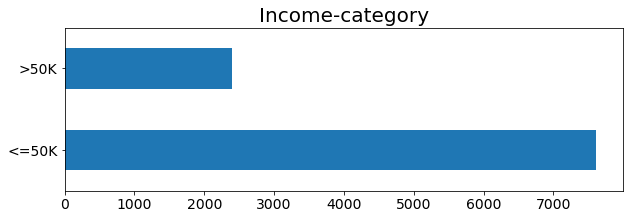

In [11]:
#displaying all columns
objects = df.select_dtypes(["object"]).columns

for features in objects:
    counts = df[features].value_counts(dropna=False)
    n = len(counts)  
    counts.plot(kind="barh", title=features, figsize=(10, max(3, n/4)))
    plt.show()

visualisation of data which will allow us to inspect any unusual observation's

Histograms for numerical types.

- As age increases beyond 40-45, the number of the observations drops rapidly.
- The distributions for capital-gain and capital-loss are extremely right skewed.
- The majority of hours-per-week observations lie between 30-40 hours.

Horizontal Bar plot for object types.

- Missing values in dataset but hidden as `?` instead of null.

In [12]:
df["Income-category"].value_counts()

<=50K    7609
>50K     2391
Name: Income-category, dtype: int64

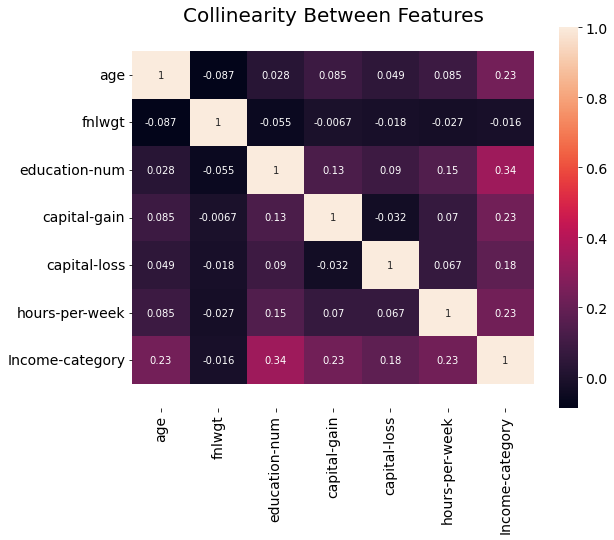

In [13]:
df["Income-category"] = df["Income-category"].apply(lambda x: 1 if x == ">50K" else 0)

correlation = df.corr()
plt.figure(figsize=(9,7))
ax = sns.heatmap(correlation, annot=True)
plt.title("Collinearity Between Features")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [14]:
df["Income-category"].value_counts()

0    7609
1    2391
Name: Income-category, dtype: int64

- The above heatmap shows that none of the features have a hgih linear correlation with the target `Income-catergory`.

- We can also see that the feature `fnlwgt` correlation score with the `target` and the rest of the features arent great.

### Summary of data and potential handling strategies

| Feature | Data type | Plan of action |
| --- | --- | --- |
| `age` | `int64` | Group ages. Apply ordinal encoding. |
| `workclass` | `object` | Replace ? with NaN and then fill in missing values. One main group exists, convert to binary, 1 if Private, else 0. |
| `fnlwgt` | `int64` | Too many unique values and no linear correlation with target. Drop feature. |
| `education` | `object` | can regroup some education as 1 |
| `education-num` | `int64` | can merge this into education and then drop column|
| `marital-status` | `object` | Apply one-hot encoding.  |
| `occupation` | `object` | Replace ? with NaN and then fill in missing values. Apply one-hot encoding. |
| `relationship` | `object` | Apply one-hot encoding. |
| `race` | `object` | One main group exists, convert to binary variable, 1 if White, else 0. |
| `sex` | `object` | Binary encode equal to 1 if Male, Female 0. |
| `capital-gain` | `int64` | Very skewed distribution from graph. Investigate further. |
| `capital-loss` | `int64` | Very skewed distribution from graph. Investigate further. |
| `hours-per-week` | `int64` | Investigate futher|
| `native-country` | `object` | Replace ? with NaN and then fill in missing values. One main group exists so we look to regroup. convert to binary variable |

#### Dealing with the `age` feature

- Binning age variables
- Applying ordinal encoding

The ages will be binned into 3 equal-width intervals. The majority of observations are in the 17-41 age group.

In [15]:
df["age"] = pd.cut(df["age"], bins=3)
df["age"].value_counts()

(16.927, 41.333]    6129
(41.333, 65.667]    3522
(65.667, 90.0]       349
Name: age, dtype: int64

In [16]:
df["age"] = df["age"].astype("category")
df["age"] = df["age"].cat.codes
df["age"].value_counts()

0    6129
1    3522
2     349
Name: age, dtype: int64

#### Dealing with the `workclass` feature

From the visual display there are missing values hidden as "?".
- Replacing "?" with null value then filling in null values with the mode of the feature.

Convert to binary 1 or 0, as "private" is the majority in this feature.
- 1 for private
- 0 for everything else

In [17]:
#replacing "?" values with null
df["workclass"][df["workclass"] == "?"] = np.nan
#checking if it was replaced
df.isnull().sum()

age                  0
workclass          547
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
Income-category      0
dtype: int64

In [18]:
#filling in values with mode
df["workclass"].fillna(df["workclass"].mode(), inplace =True)

In [19]:
df["workclass"].value_counts()

Private             6971
Self-emp-not-inc     778
Local-gov            650
State-gov            401
Self-emp-inc         354
Federal-gov          293
Without-pay            4
Never-worked           2
Name: workclass, dtype: int64

In [20]:
#created function to set feature to binary using apply function
#also changes the data type to uint8
def binary(feature, major):
    df[feature] = df[feature].apply(lambda x: 1 if x == major else 0)
    df[feature] = df[feature].astype("uint8")
    print(df[feature].value_counts())

In [21]:
binary("workclass", "Private")

1    6971
0    3029
Name: workclass, dtype: int64


#### Dealing with the ``fnlwgt`` feature

- Dropping the feature `fnlwgt`, as this has little to no correlation between the target and other features.

In [22]:
df.drop(columns="fnlwgt", inplace=True)

In [23]:
df.head()

age  workclass education  education-num      marital-status  \
0    1          1   HS-grad              9  Married-civ-spouse   
1    1          1   HS-grad              9       Never-married   
2    0          1      10th              6            Divorced   
3    0          1   HS-grad              9       Never-married   
4    0          1      11th              7       Never-married   

          occupation   relationship   race     sex  capital-gain  \
0       Craft-repair        Husband  White    Male             0   
1              Sales  Not-in-family  White  Female             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3              Sales      Own-child  White  Female             0   
4              Sales      Own-child  White  Female             0   

   capital-loss  hours-per-week native-country  Income-category  
0          1977              45  United-States                1  
1             0              40  United-States                0  
2             0              40  United-States                0  
3          1602              20  United-States                0  
4             0              15  United-States                0

In [24]:
#new dimensions after dropping fnlwgt
df.shape

(10000, 14)

#### Dealing with the `Education and Education-Num` feature

After research, in the US education system, we can group `Preschool` to `12th` together as this is people who havent graduated with any formal-level education, So for these people it doesnt really matter what type of education they had as they are adults.



In [25]:
df["education"].value_counts()

HS-grad         3231
Some-college    2220
Bachelors       1665
Masters          514
Assoc-voc        417
11th             357
Assoc-acdm       337
10th             267
7th-8th          211
Prof-school      178
9th              154
12th             144
Doctorate        135
5th-6th          109
1st-4th           46
Preschool         15
Name: education, dtype: int64

In [26]:
#list of grades I will group together
Group = ["Preschool", "1st-4th", "5th-6th", "7th-8th","9th", "10th", "11th","12th"]
#replacing the list group with "dropout"
df["education"] = df["education"].replace(to_replace = Group, value = "dropout")

Now that I have grouped some values together I can encode them by how many years they take and then I can drop the feature `education-num` as it would no longer be needed as it is similar to `education`

In [27]:
df["education"].value_counts()

HS-grad         3231
Some-college    2220
Bachelors       1665
dropout         1303
Masters          514
Assoc-voc        417
Assoc-acdm       337
Prof-school      178
Doctorate        135
Name: education, dtype: int64

In [28]:
df["education-num"].value_counts()

9     3231
10    2220
13    1665
14     514
11     417
7      357
12     337
6      267
4      211
15     178
5      154
8      144
16     135
3      109
2       46
1       15
Name: education-num, dtype: int64

After finding the order of the education with education-num I will create a new encoding as follows.

old
- dropout 0
- HS-grad  9
- Some-college 10
- Assoc-voc 11
- Assoc-acdm 12
- Bachelors 13
- Masters 14
- Prof-school 15
- Doctorate 16

New
- dropout 0
- HS-grad  1
- Some-college 2
- Assoc-voc 3
- Assoc-acdm 4
- Bachelors 5
- Masters 6
- Prof-school 7
- Doctorate 8


In [29]:
#replacing with new encoding
df["education"] = df["education"].replace(to_replace="dropout", value=0 )
df["education"] = df["education"].replace(to_replace="HS-grad", value=1 )
df["education"] = df["education"].replace(to_replace="Some-college", value=2 )
df["education"] = df["education"].replace(to_replace="Assoc-voc", value=3 )
df["education"] = df["education"].replace(to_replace="Assoc-acdm", value=4 )
df["education"] = df["education"].replace(to_replace="Bachelors", value=5 )
df["education"] = df["education"].replace(to_replace="Masters", value=6 )
df["education"] = df["education"].replace(to_replace="Prof-school", value=7 )
df["education"] = df["education"].replace(to_replace="Doctorate", value=8 )

In [30]:
#dropping education-num column
df.drop(columns="education-num", inplace=True)
#checking if new encoding worked
df["education"].value_counts()

1    3231
2    2220
5    1665
0    1303
6     514
3     417
4     337
7     178
8     135
Name: education, dtype: int64

#### Dealing with the `marital-status` feature

Marital-status is categorical which is (unordered). So I will do the following.
- Applying one hot encoding
- Changing datatype to uint8

In [31]:
data = "marital-status"
df = pd.concat([df.drop(columns=data), pd.get_dummies(df[data], prefix=data)],axis=1)
df.head()

age  workclass  education         occupation   relationship   race     sex  \
0    1          1          1       Craft-repair        Husband  White    Male   
1    1          1          1              Sales  Not-in-family  White  Female   
2    0          1          0  Handlers-cleaners  Not-in-family  White    Male   
3    0          1          1              Sales      Own-child  White  Female   
4    0          1          0              Sales      Own-child  White  Female   

   capital-gain  capital-loss  hours-per-week native-country  Income-category  \
0             0          1977              45  United-States                1   
1             0             0              40  United-States                0   
2             0             0              40  United-States                0   
3             0          1602              20  United-States                0   
4             0             0              15  United-States                0   

   marital-status_Divorced  marital-status_Married-AF-spouse  \
0                        0                                 0   
1                        0                                 0   
2                        1                                 0   
3                        0                                 0   
4                        0                                 0   

   marital-status_Married-civ-spouse  marital-status_Married-spouse-abs  \
0                                  1                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   marital-status_Never-married  marital-status_Separated  \
0                             0                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             1                         0   

   marital-status_Widowed  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

#### Dealing with the `Occupation` feature

From the visual display there are missing values hidden as "?".
- Replacing "?" with null value then filling in null values with the mode of the feature.

Occupation is categorical which is (unordered). So I will do the following.
- Applying one hot encoding
- Changing datatype to uint8

In [32]:
#replacing "?" values with null
df["occupation"][df["occupation"] == "?"] = np.nan
#checking if it was replaced
df.isnull().sum()

age                                    0
workclass                              0
education                              0
occupation                           549
relationship                           0
race                                   0
sex                                    0
capital-gain                           0
capital-loss                           0
hours-per-week                         0
native-country                         0
Income-category                        0
marital-status_Divorced                0
marital-status_Married-AF-spouse       0
marital-status_Married-civ-spouse      0
marital-status_Married-spouse-abs      0
marital-status_Never-married           0
marital-status_Separated               0
marital-status_Widowed                 0
dtype: int64

In [33]:
df["occupation"].fillna(df["occupation"].mode(),inplace=True)

In [34]:
#checking if it filled with mode
df.isnull().sum()

age                                    0
workclass                              0
education                              0
occupation                           549
relationship                           0
race                                   0
sex                                    0
capital-gain                           0
capital-loss                           0
hours-per-week                         0
native-country                         0
Income-category                        0
marital-status_Divorced                0
marital-status_Married-AF-spouse       0
marital-status_Married-civ-spouse      0
marital-status_Married-spouse-abs      0
marital-status_Never-married           0
marital-status_Separated               0
marital-status_Widowed                 0
dtype: int64

In [35]:
data = "occupation"
df = pd.concat([df.drop(columns=data), pd.get_dummies(df[data], prefix=data)],axis=1)
df.head()

age  workclass  education   relationship   race     sex  capital-gain  \
0    1          1          1        Husband  White    Male             0   
1    1          1          1  Not-in-family  White  Female             0   
2    0          1          0  Not-in-family  White    Male             0   
3    0          1          1      Own-child  White  Female             0   
4    0          1          0      Own-child  White  Female             0   

   capital-loss  hours-per-week native-country  ...  \
0          1977              45  United-States  ...   
1             0              40  United-States  ...   
2             0              40  United-States  ...   
3          1602              20  United-States  ...   
4             0              15  United-States  ...   

   occupation_Farming-fishing  occupation_Handlers-cleaners  \
0                           0                             0   
1                           0                             0   
2                           0                             1   
3                           0                             0   
4                           0                             0   

   occupation_Machine-op-inspct  occupation_Other-service  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   occupation_Priv-house-serv  occupation_Prof-specialty  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   occupation_Protective-serv  occupation_Sales  occupation_Tech-support  \
0                           0                 0                        0   
1                           0                 1                        0   
2                           0                 0                        0   
3                           0                 1                        0   
4                           0                 1                        0   

   occupation_Transport-moving  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 32 columns]

#### Dealing with the `relationship	` feature

relationship is categorical which is (unordered). So I will do the following.
- Applying one hot encoding
- Changing datatype to uint8

In [36]:
data = "relationship"
df = pd.concat([df.drop(columns=data), pd.get_dummies(df[data], prefix=data)],axis=1)
df.head()

age  workclass  education   race     sex  capital-gain  capital-loss  \
0    1          1          1  White    Male             0          1977   
1    1          1          1  White  Female             0             0   
2    0          1          0  White    Male             0             0   
3    0          1          1  White  Female             0          1602   
4    0          1          0  White  Female             0             0   

   hours-per-week native-country  Income-category  ...  \
0              45  United-States                1  ...   
1              40  United-States                0  ...   
2              40  United-States                0  ...   
3              20  United-States                0  ...   
4              15  United-States                0  ...   

   occupation_Protective-serv  occupation_Sales  occupation_Tech-support  \
0                           0                 0                        0   
1                           0                 1                        0   
2                           0                 0                        0   
3                           0                 1                        0   
4                           0                 1                        0   

   occupation_Transport-moving  relationship_Husband  \
0                            0                     1   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0                     0   

   relationship_Not-in-family  relationship_Other-relative  \
0                           0                            0   
1                           1                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  
0                       0                       0                  0  
1                       0                       0                  0  
2                       0                       0                  0  
3                       1                       0                  0  
4                       1                       0                  0  

[5 rows x 37 columns]

#### Dealing with the `race` feature

Convert to binary 1 or 0, as "White" is the majority in this feature.
- 1 for White
- 0 for everything else

In [37]:
binary("race", "White")

1    8579
0    1421
Name: race, dtype: int64


In [38]:
df.head()

age  workclass  education  race     sex  capital-gain  capital-loss  \
0    1          1          1     1    Male             0          1977   
1    1          1          1     1  Female             0             0   
2    0          1          0     1    Male             0             0   
3    0          1          1     1  Female             0          1602   
4    0          1          0     1  Female             0             0   

   hours-per-week native-country  Income-category  ...  \
0              45  United-States                1  ...   
1              40  United-States                0  ...   
2              40  United-States                0  ...   
3              20  United-States                0  ...   
4              15  United-States                0  ...   

   occupation_Protective-serv  occupation_Sales  occupation_Tech-support  \
0                           0                 0                        0   
1                           0                 1                        0   
2                           0                 0                        0   
3                           0                 1                        0   
4                           0                 1                        0   

   occupation_Transport-moving  relationship_Husband  \
0                            0                     1   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0                     0   

   relationship_Not-in-family  relationship_Other-relative  \
0                           0                            0   
1                           1                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  
0                       0                       0                  0  
1                       0                       0                  0  
2                       0                       0                  0  
3                       1                       0                  0  
4                       1                       0                  0  

[5 rows x 37 columns]

#### Dealing with the `sex` feature

Convert to binary 1 or 0.
- 1 for male
- 0 for everything else

In [39]:
binary("sex", "Male")

1    6674
0    3326
Name: sex, dtype: int64


In [40]:
df.head()

age  workclass  education  race  sex  capital-gain  capital-loss  \
0    1          1          1     1    1             0          1977   
1    1          1          1     1    0             0             0   
2    0          1          0     1    1             0             0   
3    0          1          1     1    0             0          1602   
4    0          1          0     1    0             0             0   

   hours-per-week native-country  Income-category  ...  \
0              45  United-States                1  ...   
1              40  United-States                0  ...   
2              40  United-States                0  ...   
3              20  United-States                0  ...   
4              15  United-States                0  ...   

   occupation_Protective-serv  occupation_Sales  occupation_Tech-support  \
0                           0                 0                        0   
1                           0                 1                        0   
2                           0                 0                        0   
3                           0                 1                        0   
4                           0                 1                        0   

   occupation_Transport-moving  relationship_Husband  \
0                            0                     1   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0                     0   

   relationship_Not-in-family  relationship_Other-relative  \
0                           0                            0   
1                           1                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  
0                       0                       0                  0  
1                       0                       0                  0  
2                       0                       0                  0  
3                       1                       0                  0  
4                       1                       0                  0  

[5 rows x 37 columns]

#### Dealing with the `capital-gain` and `captial-loss` features

From my observations They are similar so I can merge them together into one feature instead of having 2.

- Merge features.
- Drop features.

Apply encoding to were:
- positive is 1
- negative is -1
- No difference/0 is 0

In [41]:
#creating new feature called capital with the differences of capital gain and loss
df["capital"] = df["capital-gain"] - df["capital-loss"]
#dropping the two features
df.drop(columns=["capital-gain", "capital-loss"], inplace=True)

In [42]:
#replacing values
df["capital"][df["capital"] == 0] = 0
df["capital"][df["capital"] < 0] = -1
df["capital"][df["capital"] > 0] = 1

In [43]:
df["capital"].value_counts()

 0    8712
 1     822
-1     466
Name: capital, dtype: int64

In [44]:
df.head()

age  workclass  education  race  sex  hours-per-week native-country  \
0    1          1          1     1    1              45  United-States   
1    1          1          1     1    0              40  United-States   
2    0          1          0     1    1              40  United-States   
3    0          1          1     1    0              20  United-States   
4    0          1          0     1    0              15  United-States   

   Income-category  marital-status_Divorced  marital-status_Married-AF-spouse  \
0                1                        0                                 0   
1                0                        0                                 0   
2                0                        1                                 0   
3                0                        0                                 0   
4                0                        0                                 0   

   ...  occupation_Sales  occupation_Tech-support  \
0  ...                 0                        0   
1  ...                 1                        0   
2  ...                 0                        0   
3  ...                 1                        0   
4  ...                 1                        0   

   occupation_Transport-moving  relationship_Husband  \
0                            0                     1   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0                     0   

   relationship_Not-in-family  relationship_Other-relative  \
0                           0                            0   
1                           1                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  capital  
0                       0                       0                  0       -1  
1                       0                       0                  0        0  
2                       0                       0                  0        0  
3                       1                       0                  0       -1  
4                       1                       0                  0        0  

[5 rows x 36 columns]

#### Dealing with the `hours-per-week` feature

Looking at the values inside of hourse-per-week feature and see that there are many unqiue values but are in range of each other so I can group them together.

normal work hours are between 30-40, So anything more or less would be the other 2 groups.

- Normal hours 30-40 : 1
- Parttime hours < 30 : 0
- overtime hours > 40 : 2

In [45]:
#encoding the hours per week into groups
df["hours-per-week"] = df["hours-per-week"].apply(lambda x:0 if x < 30 else (2 if x > 40 else 1))

In [46]:
df["hours-per-week"].value_counts()

1    5784
2    2965
0    1251
Name: hours-per-week, dtype: int64

As we can see the majority is the normal hours 30 - 40 known in our dataset as ``1``

#### Dealing with the `native-country` feature

As we know there are missing values hidden as `?`

- Replacing `?` as null and fill it in with the mode.

In [47]:
#replacing "?" values with null
df["native-country"][df["native-country"] == "?"] = np.nan
#checking if it was replaced
df.isnull().sum()

age                                    0
workclass                              0
education                              0
race                                   0
sex                                    0
hours-per-week                         0
native-country                       168
Income-category                        0
marital-status_Divorced                0
marital-status_Married-AF-spouse       0
marital-status_Married-civ-spouse      0
marital-status_Married-spouse-abs      0
marital-status_Never-married           0
marital-status_Separated               0
marital-status_Widowed                 0
occupation_Adm-clerical                0
occupation_Armed-Forces                0
occupation_Craft-repair                0
occupation_Exec-managerial             0
occupation_Farming-fishing             0
occupation_Handlers-cleaners           0
occupation_Machine-op-inspct           0
occupation_Other-service               0
occupation_Priv-house-serv             0
occupation_Prof-

In [48]:
df["native-country"].fillna(df["native-country"].mode(), inplace=True)
#checking if it filled missing values
df.isnull().sum()

age                                    0
workclass                              0
education                              0
race                                   0
sex                                    0
hours-per-week                         0
native-country                       168
Income-category                        0
marital-status_Divorced                0
marital-status_Married-AF-spouse       0
marital-status_Married-civ-spouse      0
marital-status_Married-spouse-abs      0
marital-status_Never-married           0
marital-status_Separated               0
marital-status_Widowed                 0
occupation_Adm-clerical                0
occupation_Armed-Forces                0
occupation_Craft-repair                0
occupation_Exec-managerial             0
occupation_Farming-fishing             0
occupation_Handlers-cleaners           0
occupation_Machine-op-inspct           0
occupation_Other-service               0
occupation_Priv-house-serv             0
occupation_Prof-

In [49]:
df["native-country"].value_counts()

United-States            8979
Mexico                    202
Philippines                66
Canada                     36
Germany                    33
Puerto-Rico                31
Jamaica                    27
South                      27
Italy                      26
China                      26
Cuba                       25
India                      24
Guatemala                  23
England                    23
Vietnam                    22
Poland                     21
Haiti                      20
El-Salvador                20
Japan                      20
Dominican-Republic         17
Iran                       16
Nicaragua                  15
Columbia                   15
Portugal                   15
Taiwan                     12
Ireland                    10
Peru                       10
Greece                      9
Laos                        9
Ecuador                     8
Thailand                    6
Hong                        6
Trinadad&Tobago             6
France    

Now that I have filled in the missing values with mode, we can see that most people are from USA which is quite obvious as this is a USA census. So I convert this feature into binary and have USA set as 1 and everything else as 0.

In [50]:
#calling function we maded earlier
binary("native-country", "United-States")

1    8979
0    1021
Name: native-country, dtype: int64


#### Doing final checks on the dataset

In [51]:
cleandf = df.copy()
df.head()

age  workclass  education  race  sex  hours-per-week  native-country  \
0    1          1          1     1    1               2               1   
1    1          1          1     1    0               1               1   
2    0          1          0     1    1               1               1   
3    0          1          1     1    0               0               1   
4    0          1          0     1    0               0               1   

   Income-category  marital-status_Divorced  marital-status_Married-AF-spouse  \
0                1                        0                                 0   
1                0                        0                                 0   
2                0                        1                                 0   
3                0                        0                                 0   
4                0                        0                                 0   

   ...  occupation_Sales  occupation_Tech-support  \
0  ...                 0                        0   
1  ...                 1                        0   
2  ...                 0                        0   
3  ...                 1                        0   
4  ...                 1                        0   

   occupation_Transport-moving  relationship_Husband  \
0                            0                     1   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0                     0   

   relationship_Not-in-family  relationship_Other-relative  \
0                           0                            0   
1                           1                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  capital  
0                       0                       0                  0       -1  
1                       0                       0                  0        0  
2                       0                       0                  0        0  
3                       1                       0                  0       -1  
4                       1                       0                  0        0  

[5 rows x 36 columns]

Clean dataset Observations:
- 10000 rows
- target variable called Income-category
- 35 features

### Evaluation Measure

To select the evaluation measure I will split the dataset into a train and test set, this is to avoid data peeking.



In our dataset we have a small percentage of people who earn more than 50k a year in the `Income-category` which is our target class

In [52]:
cleandf["Income-category"].value_counts()

0    7609
1    2391
Name: Income-category, dtype: int64

<AxesSubplot:title={'center':'Class distribution'}, xlabel='Income-category'>

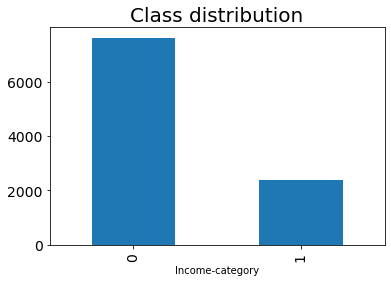

In [53]:
#verifying class imbalance
cleandf.pivot_table(index='Income-category', aggfunc='size').plot(kind='bar', title = 'Class distribution')

However, it is risky to do a standard random train/test split when having strong class imbalance. Due to the very small number of high income cases, you might end up with a train and test set that have very different class distributions.

Stratified sampling is a sampling method that avoids disturbing class balance in your samples. It allows you to generate a train and a test set with the exact same class balance as in the original data.

The outcome of this data set has a 2 class ratio of **(3 : 1)**, we can consider this as imbalanced data.

- So I set stratify = ``df["Income-category"]``

In [54]:
#for my train test split I will use the proportions 70/30
#random = 1 so we can reproduce the results
train, test = train_test_split(cleandf, test_size = 0.3, stratify=cleandf["Income-category"], random_state=1)

I split the data into 70% train and 30% test and used randomstate to ensure reproducible results


In [55]:
train.shape

(7000, 36)

In [56]:
test.shape

(3000, 36)

In [57]:
features = ['age', 'workclass', 'education', 'race', 'sex', 'hours-per-week',
       'native-country', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-abs', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'capital']



Rather than using accuracy to evaluate the models, popular evaluation on imbalanced data measures are precision and recall (sensitivity) which measures the relavancy and true positive rate which can be more meaningful since we care about the performance of the model on unseen data.

I will mainly explore **Balanced Accuracy rate** as it deals with skewed classes like we have here, I would like to also evaluate on F1 measure as its a trade off between precision and recall.

## Q1 B) 3 basic classifiers
Evaluate the performance of three basic classifiers on your dataset: a decision tree
with depth at most 3, a neural network with at most 10 hidden nodes and 1-NN.
You can do basic parameter tuning, but there is no need to go overboard. The goal
in this step is simply to create better than random classifiers.

#### i. First we evaluate the performance for Decision Tree with Max depth 3

In [58]:
DTC_model = DecisionTreeClassifier(max_depth=3)

And we use the Stratified Kfold cross-validation technique with  to test the model multiple times. then calculate an **avraged balanced accuracy** for this model 

Here we are doing Kfold **With shuffling , and random_state=42** as it gave the best accuracy

In [74]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(DTC_model, train[features], train["Income-category"], cv=cv, scoring='balanced_accuracy')
test_score = results["test_score"]
test_score

array([0.69839535, 0.69886483, 0.69522808, 0.69613202, 0.70286538])

In [76]:
print(f"The average balanced accuracy is " f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

The average balanced accuracy is 0.698 +/- 0.003


### Confusion matrix

In [77]:
DTC = DTC_model.fit(train[features], train["Income-category"])

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2283
           1       0.70      0.48      0.57       717

    accuracy                           0.83      3000
   macro avg       0.78      0.71      0.73      3000
weighted avg       0.81      0.83      0.81      3000

Balanced Accuracy:  70.63 %
F1 Score is:  56.72 %


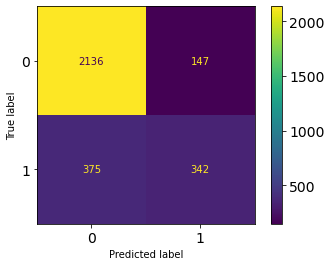

In [78]:
def model(data):
    #features that will be used in the train set

    data.score(train[features],train["Income-category"])
    pred = data.predict(test[features])
    #printing classifciation report
    print(classification_report(test["Income-category"], pred))
    #printing the accucary using the f1 score
    accuracy = balanced_accuracy_score(test["Income-category"], pred)
    print("Balanced Accuracy: ", np.round(accuracy*100,2), "%")
    print("F1 Score is: ", np.round(f1_score(test["Income-category"], pred)*100,2), "%")
    plot_confusion_matrix(data, test[features], test["Income-category"])
    
model(DTC)

#### ii. Now  we evaluate Neural network with 10 hidden nodes

In [79]:
MLP_classifier = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300,activation = 'logistic',solver='sgd',learning_rate_init= 0.1,random_state=1)

Here, we employ the Sklearn MLP classifier for neural networks. We specify hidden layers with a value of 10, where the ith element reflects the ith hidden layer's n layers – 2 number of neurons.

max_iteration to be 300 as it was suggested on the web, activation function is the sigmoid function mentioned in class, learning_rate_init controls the step-size in updating the weights for solver 'sgd' (stochastic gradient descent).

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2283
           1       0.67      0.67      0.67       717

    accuracy                           0.84      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.84      0.84      0.84      3000

Balanced Accuracy:  78.26 %
F1 Score is:  66.95 %


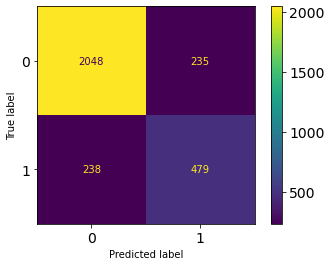

In [80]:
MLP = MLP_classifier.fit(train[features], train["Income-category"])
model(MLP)

#### iii. NearestNeighbour

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2283
           1       0.57      0.58      0.58       717

    accuracy                           0.80      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.80      0.80      0.80      3000

Balanced Accuracy:  72.24 %
F1 Score is:  57.7 %


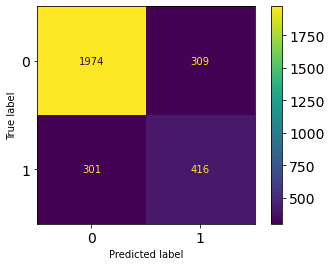

In [81]:
NN_classifier = KNeighborsClassifier(n_neighbors=1)
NN = NN_classifier.fit(train[features], train["Income-category"])
model(NN)

### The evaluation results of Balanced accuracy are as follows:
Decision tree: 
- Precision: 0.70 
- Recall: 0.48
- F1 score: 56.72 %
- Balanced accuracy: 70.63 %

Neural Networks:
- Precision: 0.67 
- Recall: 0.67
- F1 score: 66.95 %
- Balanced accuracy: 78.26 %

1-NN: 
- Precision: 0.57 
- Recall: 0.58
- F1 score: 57.7 %
- Balanced accuracy: 72.24 %

we see that Neural network with 10 hidden nodes has highest **balanced accuracy** of 78%. And also the highest **recall** (proportion of correct positive predictions made out of all positive predictions that could have been made) with 0.67 as well as the highest **F1 score** of 66.95%

#### Since Decision tree was the worst performing from evaluation lets hyper parameter tune it. 

In [90]:
grid_params = {
    "criterion": ["gini", "entropy"], 
    "max_depth": range(1, 4), # depth <= 3
    "min_samples_leaf": range(1, 11),
}

In [91]:
gs = GridSearchCV(DecisionTreeClassifier(), grid_params, scoring= verbose = 1, cv=5)
gs_classifier = gs.fit(train[features], train["Income-category"])


Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [92]:
print(f"Best score: {gs_classifier.best_score_}")
print(f"Best params: {gs_classifier.best_params_}")

Best score: 0.8237142857142856
Best params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}


In [95]:
DTC_tuned = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1, criterion="gini")
tuned_DTC = DTC_tuned.fit(train[features], train["Income-category"])

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2283
           1       0.70      0.48      0.57       717

    accuracy                           0.83      3000
   macro avg       0.78      0.71      0.73      3000
weighted avg       0.81      0.83      0.81      3000

Balanced Accuracy:  70.63 %
F1 Score is:  56.72 %


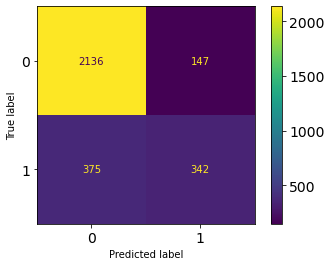

In [96]:
model(tuned_DTC)

In this case the tuned results are the same, and I believe it is due to the fact we measured balanced accuracy, and since we restrict it with max_dept 3 not much improvements could be made. But if the evaluation was on accuracy we might've seen an improvement.

## Question 1 C - Ensembles with bagging

#### Ensemble for Decision Tree

In [104]:
folds = 10
v = 0
scores_tree = cross_val_score(DTC_model, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)
print("Mean accuracy for D-Tree is: {:.3f}".format(scores_tree.mean()))

Mean accuracy for D-Tree is: 0.824


The cross validation score for our decision tree model with 10-folds is 0.824


In [100]:
for i in (2,4,6,8,10,12,14,16,18,20):
    tree_bag = BaggingClassifier(DTC_model, 
                            n_estimators = i,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True, random_state=1)

    scores_tree_bag = cross_val_score(tree_bag, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)


    print("Mean accuracy for D_Tree_bag with the ensemble of size {:.1f} : {:.3f}".format(i,scores_tree_bag.mean()))

Mean accuracy for D_Tree_bag with the ensemble of size 2.0 : 0.823
Mean accuracy for D_Tree_bag with the ensemble of size 4.0 : 0.826
Mean accuracy for D_Tree_bag with the ensemble of size 6.0 : 0.825
Mean accuracy for D_Tree_bag with the ensemble of size 8.0 : 0.825
Mean accuracy for D_Tree_bag with the ensemble of size 10.0 : 0.824
Mean accuracy for D_Tree_bag with the ensemble of size 12.0 : 0.824
Mean accuracy for D_Tree_bag with the ensemble of size 14.0 : 0.824
Mean accuracy for D_Tree_bag with the ensemble of size 16.0 : 0.824
Mean accuracy for D_Tree_bag with the ensemble of size 18.0 : 0.824
Mean accuracy for D_Tree_bag with the ensemble of size 20.0 : 0.824


For Decision Tree, the cross validation score before ensembles is 0.824, after applying ensembles, we see the highest score was achieved with 4 members: 0.73

This also shows that **ensembles with bagging doesnt necesarrily work well for DecisionTree classifier** when the member size increases as we see that increase in size doesn't lead to better performance.

#### Ensembles for Neural network

In [105]:
scores_MLP = cross_val_score(MLP_classifier, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)
print("Mean accuracy for Neural network is: {:.3f}".format(scores_MLP.mean()))

Mean accuracy for Neural network is: 0.844


In [102]:
for i in (2,4,6,8,10,12,14,16,18,20):
    MLP_bag = BaggingClassifier(MLP_classifier, 
                            n_estimators = i,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True, random_state=1)

    scores_MLP_bag = cross_val_score(MLP_bag, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)


    print("Mean accuracy for MLP_bag with the ensemble of size {:.1f} : {:.3f}".format(i,scores_MLP_bag.mean()))

Mean accuracy for MLP_bag with the ensemble of size 2.0 : 0.843
Mean accuracy for MLP_bag with the ensemble of size 4.0 : 0.845
Mean accuracy for MLP_bag with the ensemble of size 6.0 : 0.845
Mean accuracy for MLP_bag with the ensemble of size 8.0 : 0.845
Mean accuracy for MLP_bag with the ensemble of size 10.0 : 0.845
Mean accuracy for MLP_bag with the ensemble of size 12.0 : 0.846
Mean accuracy for MLP_bag with the ensemble of size 14.0 : 0.846
Mean accuracy for MLP_bag with the ensemble of size 16.0 : 0.846
Mean accuracy for MLP_bag with the ensemble of size 18.0 : 0.845
Mean accuracy for MLP_bag with the ensemble of size 20.0 : 0.846


For Neural Networks, the cross validation score before ensembles is 0.844, after applying ensembles, we see the highest score was achieved with 12 members: 0.846

This also shows that **ensembles with bagging doesnt necesarrily work well for Neural Networks** when the member size increases as we see that increase in size doesn't lead to better performance.

#### Ensembles for 1-NN

In [106]:
scores_NN = cross_val_score(NN_classifier, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)
print("Mean accuracy for 1-NN is: {:.3f}".format(scores_NN.mean()))

Mean accuracy for 1-NN is: 0.792


In [107]:
for i in (2,4,6,8,10,12,14,16,18,20):
    NN_bag = BaggingClassifier(NN_classifier, 
                            n_estimators = i,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True, random_state=1)

    scores_NN_bag = cross_val_score(NN_bag, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)


    print("Mean accuracy for NN with the ensemble of size {:.1f} : {:.3f}".format(i,scores_NN_bag.mean()))

Mean accuracy for NN with the ensemble of size 2.0 : 0.803
Mean accuracy for NN with the ensemble of size 4.0 : 0.811
Mean accuracy for NN with the ensemble of size 6.0 : 0.810
Mean accuracy for NN with the ensemble of size 8.0 : 0.814
Mean accuracy for NN with the ensemble of size 10.0 : 0.816
Mean accuracy for NN with the ensemble of size 12.0 : 0.817
Mean accuracy for NN with the ensemble of size 14.0 : 0.817
Mean accuracy for NN with the ensemble of size 16.0 : 0.816
Mean accuracy for NN with the ensemble of size 18.0 : 0.819
Mean accuracy for NN with the ensemble of size 20.0 : 0.817


For 1-NN, the cross validation score before ensembles is 0.792, after applying ensembles,  but from ensembles with bagging we see that the score improves up to 0.819 for 18 members

This also shows that **ensembles with bagging doesnt necesarrily work well for KNN classifier** when the member size increases as we see that increase in size doesn't lead to better performance.

This is becuase KN is a stable classifier, and resampling doesn't introduce diversity like it does for Decision tree. 

### Investigating effect of number of instances in ensembles.

In [108]:
for i in (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0):
    tree_bag_2 = BaggingClassifier(DTC_model, 
                            n_estimators = 20,
                            max_samples = i, # bootstrap resampling 
                            bootstrap = True, random_state=1)

    scores_tree_bag_2 = cross_val_score(tree_bag_2, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)


    print("Mean accuracy for D_Tree_bag with the max_samples {:.1f} : {:.3f}".format(i,scores_tree_bag_2.mean()))

Mean accuracy for D_Tree_bag with the max_samples 0.1 : 0.830
Mean accuracy for D_Tree_bag with the max_samples 0.2 : 0.829
Mean accuracy for D_Tree_bag with the max_samples 0.3 : 0.827
Mean accuracy for D_Tree_bag with the max_samples 0.4 : 0.826
Mean accuracy for D_Tree_bag with the max_samples 0.5 : 0.826
Mean accuracy for D_Tree_bag with the max_samples 0.6 : 0.826
Mean accuracy for D_Tree_bag with the max_samples 0.7 : 0.826
Mean accuracy for D_Tree_bag with the max_samples 0.8 : 0.826
Mean accuracy for D_Tree_bag with the max_samples 0.9 : 0.826
Mean accuracy for D_Tree_bag with the max_samples 1.0 : 0.824


In [109]:
for i in (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0):
    MLP_bag_2 = BaggingClassifier(MLP_classifier, 
                            n_estimators = 20,
                            max_samples = i, # bootstrap resampling 
                            bootstrap = True, random_state=1)

    scores_MLP_bag_2 = cross_val_score(MLP_bag_2, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)


    print("Mean accuracy for MLP_bag with the max_samples {:.1f} : {:.3f}".format(i,scores_MLP_bag_2.mean()))

Mean accuracy for MLP_bag with the max_samples 0.1 : 0.837
Mean accuracy for MLP_bag with the max_samples 0.2 : 0.840
Mean accuracy for MLP_bag with the max_samples 0.3 : 0.844
Mean accuracy for MLP_bag with the max_samples 0.4 : 0.846
Mean accuracy for MLP_bag with the max_samples 0.5 : 0.846
Mean accuracy for MLP_bag with the max_samples 0.6 : 0.847
Mean accuracy for MLP_bag with the max_samples 0.7 : 0.846
Mean accuracy for MLP_bag with the max_samples 0.8 : 0.846
Mean accuracy for MLP_bag with the max_samples 0.9 : 0.846
Mean accuracy for MLP_bag with the max_samples 1.0 : 0.846


In [110]:
for i in (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0):
    NN_bag_2 = BaggingClassifier(NN_classifier, 
                            n_estimators = 4,
                            max_samples = i, # bootstrap resampling 
                            bootstrap = True, random_state=1)

    scores_NN_bag_2 = cross_val_score(NN_bag_2, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)


    print("Mean accuracy for NN_bag with the max_samples {:.1f} : {:.3f}".format(i,scores_NN_bag_2.mean()))

Mean accuracy for NN_bag with the max_samples 0.1 : 0.816
Mean accuracy for NN_bag with the max_samples 0.2 : 0.818
Mean accuracy for NN_bag with the max_samples 0.3 : 0.816
Mean accuracy for NN_bag with the max_samples 0.4 : 0.816
Mean accuracy for NN_bag with the max_samples 0.5 : 0.814
Mean accuracy for NN_bag with the max_samples 0.6 : 0.813
Mean accuracy for NN_bag with the max_samples 0.7 : 0.813
Mean accuracy for NN_bag with the max_samples 0.8 : 0.812
Mean accuracy for NN_bag with the max_samples 0.9 : 0.811
Mean accuracy for NN_bag with the max_samples 1.0 : 0.811


The results for the 3 classifiers are quite interesting as **decision tree** and **1-NN** are quite similar whilest **Neural network** was different regarding different sample sizes. First we should know that the **max_samples** parameter can take int or floats where:
- if int, it draws **max_samples** samples.
- if float, then it draws **max_samples * X.shape[0]** (rows) samples

By default max_samples is 1.0, which implies all rows of the data from X. 

So, by taking the ensemble size for each classifier that gives the highest validation score (20 for DTC and MLP, 4 for NN), we iterate different values of **max_samples** ranging from 0.1 to 1.0 in steps of 0.1.


With Decision tree and 1-NN, we see that the cross validation score actually decreases as max_sample size increases. With the values we provided, we achieved the highest score with max_samples = 0.1, for D_tree with score of 0.830 which was 0.824 and achieved the highest score with max_samples = 0.2, for NN with score 0.818, which was 0.792.

However with Neural network (MLP) we see that the cross validation score actually increased. It went up 0.1%, achieving  slightly higher score of 0.847 with **max_samples = 0.6**

Thus we can conclude for classification models like Decision tree with max depth 3 and 1 nearest neighbour, higher or the highest number of sample size doesn't always give you the best cross validation score. This could potentially due to the fact that too many sample lead to overfitting and accounts the noise in data and effect its performance on unseen data And with Neural network (MLP classifier) significant change was found by the variation in max_samples = 0.6.

## Question 1 - D

Apply ensembles with random subspacing using the three classifiers from Task (b).
Investigate the performance of each of these classifiers as the ensemble size
increases (e.g., in steps of 2 from 2 to 20 members). Using the best performing
ensemble size, investigate how changing the number of features used when
applying random subspacing affects classification performance

#### Ensembles with random subspacing

Here we generate the ensemble of 2 to 20 classifiers each trained using a subset of 50% of features selected at random - max_features=0.5

Its also good to know that bagging classifier has a boolean parameter bootstrap_features which by default = False, implying that sampling without replacement is performed which is what we want as sampling with a duplicate feature will just be redundant and not helping.

#### Random subspacing for Decision tree

In [112]:
scores_tree = cross_val_score(DTC_model, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)
print("Mean accuracy for D-Tree without ensembles {:.3f}".format(scores_tree.mean()))

for i in (2,4,6,8,10,12,14,16,18,20):
    random_SS_tree = BaggingClassifier(DTC_model, 
                            n_estimators = i,
                            max_samples=1.0, 
                            max_features=0.5, random_state=1)
    
    scores_tree_rSS = cross_val_score(random_SS_tree, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)

    
    print("Mean accuracy for DTC_rSS with the ensemble of size {:.1f} : {:.3f}".format(i,scores_tree_rSS.mean()))

Mean accuracy for D-Tree without ensembles 0.824
Mean accuracy for DTC_rSS with the ensemble of size 2.0 : 0.803
Mean accuracy for DTC_rSS with the ensemble of size 4.0 : 0.804
Mean accuracy for DTC_rSS with the ensemble of size 6.0 : 0.811
Mean accuracy for DTC_rSS with the ensemble of size 8.0 : 0.812
Mean accuracy for DTC_rSS with the ensemble of size 10.0 : 0.818
Mean accuracy for DTC_rSS with the ensemble of size 12.0 : 0.824
Mean accuracy for DTC_rSS with the ensemble of size 14.0 : 0.827
Mean accuracy for DTC_rSS with the ensemble of size 16.0 : 0.824
Mean accuracy for DTC_rSS with the ensemble of size 18.0 : 0.823
Mean accuracy for DTC_rSS with the ensemble of size 20.0 : 0.822


#### Random subspacing for Neural Network - MLP

In [113]:
scores_MLP = cross_val_score(MLP_classifier, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)
print("Mean accuracy for Neural Network - MLP without ensembles {:.3f}".format(scores_MLP.mean()))

for i in (2,4,6,8,10,12,14,16,18,20):
    random_SS_MLP = BaggingClassifier(MLP_classifier, 
                            n_estimators = i,
                            max_samples=1.0, 
                            max_features=0.5, random_state=1)
    
    scores_MLP_rSS = cross_val_score(random_SS_MLP, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)

    
    print("Mean accuracy for Neural Network - MLP_rSS with the ensemble of size {:.1f} : {:.3f}".format(i,scores_MLP_rSS.mean()))

Mean accuracy for Neural Network - MLP without ensembles 0.844
Mean accuracy for Neural Network - MLP_rSS with the ensemble of size 2.0 : 0.817
Mean accuracy for Neural Network - MLP_rSS with the ensemble of size 4.0 : 0.823
Mean accuracy for Neural Network - MLP_rSS with the ensemble of size 6.0 : 0.837
Mean accuracy for Neural Network - MLP_rSS with the ensemble of size 8.0 : 0.836
Mean accuracy for Neural Network - MLP_rSS with the ensemble of size 10.0 : 0.844
Mean accuracy for Neural Network - MLP_rSS with the ensemble of size 12.0 : 0.848
Mean accuracy for Neural Network - MLP_rSS with the ensemble of size 14.0 : 0.849
Mean accuracy for Neural Network - MLP_rSS with the ensemble of size 16.0 : 0.848
Mean accuracy for Neural Network - MLP_rSS with the ensemble of size 18.0 : 0.847
Mean accuracy for Neural Network - MLP_rSS with the ensemble of size 20.0 : 0.845


#### Random subspacing for 1-NN

In [115]:
scores_NN = cross_val_score(NN_classifier, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)
print("Mean accuracy for 1-NN without ensembles {:.3f}".format(scores_NN.mean()))

for i in (2,4,6,8,10,12,14,16,18,20):
    random_SS_NN = BaggingClassifier(NN_classifier, 
                            n_estimators = i,
                            max_samples=1.0, 
                            max_features=0.5, random_state=1)
    
    scores_NN_rSS = cross_val_score(random_SS_NN, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)

    
    print("Mean accuracy for NN_rSS with the ensemble of size {:.1f} : {:.3f}".format(i,scores_NN_rSS.mean()))

Mean accuracy for 1-NN without ensembles 0.792
Mean accuracy for NN_rSS with the ensemble of size 2.0 : 0.778
Mean accuracy for NN_rSS with the ensemble of size 4.0 : 0.792
Mean accuracy for NN_rSS with the ensemble of size 6.0 : 0.803
Mean accuracy for NN_rSS with the ensemble of size 8.0 : 0.811
Mean accuracy for NN_rSS with the ensemble of size 10.0 : 0.823
Mean accuracy for NN_rSS with the ensemble of size 12.0 : 0.828
Mean accuracy for NN_rSS with the ensemble of size 14.0 : 0.831
Mean accuracy for NN_rSS with the ensemble of size 16.0 : 0.834
Mean accuracy for NN_rSS with the ensemble of size 18.0 : 0.835
Mean accuracy for NN_rSS with the ensemble of size 20.0 : 0.834


First we perform random subspacing for all 3 classifiers with 50 % of features chosen and varying the number of members. 

We noticed already that with the **unstable classifiers DTC & MLP**, the cross validation score does  produce a steady increase but instead has a small decrease around the higher range of members. And the highest value was similar to its highest value from the previous step.

Where as 1-NN has a **continuous increase along the way**. And the highest value before modifying the feature subset size has already exceeded the result from the previous step.

And the ensemble size that generated the highest score for each classifier is as follows:
- **DTC: size = 14.0, score = 0.827**
- **MLP: size = 16.0, score = 0.849**
- **1-NN: size = 18.0, score = 0.835**

### Ensembles with varied number of features for random subspacing

#### Decision Tree with varied feature proportion

In [122]:
scores_tree = cross_val_score(DTC_model, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)
print("Mean accuracy for D-Tree without random subspacing {:.3f}".format(scores_tree.mean()))
print("With best ensembles DTC: size = 14.0, score = 0.827")

for i in (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0):
    random_SS_tree = BaggingClassifier(DTC_model, 
                            n_estimators = 18,
                            max_samples=1.0, 
                            max_features=i, random_state=1)
    
    scores_tree_rSS = cross_val_score(random_SS_tree, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)

    
    print("Mean accuracy for DTC_rSS with random subspacing of {:.1f} : {:.3f}".format(i,scores_tree_rSS.mean()))

Mean accuracy for D-Tree without random subspacing 0.824
With best ensembles DTC: size = 14.0, score = 0.827
Mean accuracy for DTC_rSS with random subspacing of 0.1 : 0.761
Mean accuracy for DTC_rSS with random subspacing of 0.2 : 0.790
Mean accuracy for DTC_rSS with random subspacing of 0.3 : 0.797
Mean accuracy for DTC_rSS with random subspacing of 0.4 : 0.822
Mean accuracy for DTC_rSS with random subspacing of 0.5 : 0.823
Mean accuracy for DTC_rSS with random subspacing of 0.6 : 0.826
Mean accuracy for DTC_rSS with random subspacing of 0.7 : 0.828
Mean accuracy for DTC_rSS with random subspacing of 0.8 : 0.829
Mean accuracy for DTC_rSS with random subspacing of 0.9 : 0.828
Mean accuracy for DTC_rSS with random subspacing of 1.0 : 0.824


#### 1 - NN with varied feature proportion

In [123]:
scores_NN = cross_val_score(NN_classifier, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)
print("Mean accuracy for 1-NN without random subspacing {:.3f}".format(scores_NN.mean()))
print("1-NN: size = 18.0, score = 0.835")

for i in (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0):
    random_SS_NN = BaggingClassifier(NN_classifier, 
                            n_estimators = 20,
                            max_samples=1.0, 
                            max_features=i, random_state=1)
    
    scores_NN_rSS = cross_val_score(random_SS_NN, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)

    
    print("Mean accuracy for NN_rSS with random subspacing of {:.1f} : {:.3f}".format(i,scores_NN_rSS.mean()))

Mean accuracy for 1-NN without random subspacing 0.792
1-NN: size = 18.0, score = 0.835
Mean accuracy for NN_rSS with random subspacing of 0.1 : 0.766
Mean accuracy for NN_rSS with random subspacing of 0.2 : 0.786
Mean accuracy for NN_rSS with random subspacing of 0.3 : 0.805
Mean accuracy for NN_rSS with random subspacing of 0.4 : 0.830
Mean accuracy for NN_rSS with random subspacing of 0.5 : 0.834
Mean accuracy for NN_rSS with random subspacing of 0.6 : 0.835
Mean accuracy for NN_rSS with random subspacing of 0.7 : 0.836
Mean accuracy for NN_rSS with random subspacing of 0.8 : 0.831
Mean accuracy for NN_rSS with random subspacing of 0.9 : 0.829
Mean accuracy for NN_rSS with random subspacing of 1.0 : 0.817


#### Neural Networks with varied feature proportion

In [124]:
scores_MLP = cross_val_score(MLP_classifier, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)
print("Mean accuracy for MLP without random subspacing {:.3f}".format(scores_MLP.mean()))
print("MLP: MLP:  size = 16.0, score = 0.849")

for i in (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0):
    random_SS_MLP = BaggingClassifier(MLP_classifier, 
                            n_estimators = 16,
                            max_samples=1.0, 
                            max_features=i, random_state=1)
    
    scores_MLP_rSS = cross_val_score(random_SS_MLP, cleandf[features], cleandf["Income-category"], cv=folds, verbose = v, n_jobs = -1)

    
    print("Mean accuracy for MLP_rSS with random subspacing of {:.1f} : {:.3f}".format(i,scores_MLP_rSS.mean()))

Mean accuracy for MLP without random subspacing 0.844
MLP: MLP:  size = 16.0, score = 0.849
Mean accuracy for MLP_rSS with random subspacing of 0.1 : 0.761
Mean accuracy for MLP_rSS with random subspacing of 0.2 : 0.797
Mean accuracy for MLP_rSS with random subspacing of 0.3 : 0.804
Mean accuracy for MLP_rSS with random subspacing of 0.4 : 0.842
Mean accuracy for MLP_rSS with random subspacing of 0.5 : 0.848
Mean accuracy for MLP_rSS with random subspacing of 0.6 : 0.847
Mean accuracy for MLP_rSS with random subspacing of 0.7 : 0.848
Mean accuracy for MLP_rSS with random subspacing of 0.8 : 0.847
Mean accuracy for MLP_rSS with random subspacing of 0.9 : 0.845
Mean accuracy for MLP_rSS with random subspacing of 1.0 : 0.846


#### Results

After seeing the different score produced by altering the number of features selected on the best performing ensembles size in Random subspacing we have some interesting results.

Firstly, before we produced the results for different feature sizes, we compared the cross validation score for the classifiers with max_features set to 0.5, and already we see that the highest scoring member size for 1-NN (stable classifier) had a higher improvement than unstable classifiers (DTC & MLP).

For example : 
- Decision tree:
    - **Original = `0.824`, highest performing ensemble with 0.5 features = `0.827`**
    - Improvement of 0.003
- Neural Network:
    - **Original = `0.844`, highest performing ensemble with 0.5 features = `0.849`**
    - Improvement of 0.005
- Nearest Neighbour:
    - **Original = `0.792`, highest performing ensemble with 0.5 features = `0.835`**
    - Improvement of 0.043

After seeing the results for different max_features options ranging from `0.1 - 1.0`, we see that **selecting too little or too many features will not maximise accuracy**. This is expected since *small amount of features will result in `underfitting`*, and *too many features* can introduce noise, as some features aren't that important in helping our model to learn and effect our model's prediction on unseen data. 

And across all 3 classifiers, by selecting around half of the features produced the best accuracy. (`max_features = 0.6` for DTC & MLP, and `max_features = 0.5` for 1-NN, in this dataset)

## Question 1 - E

Based on the lectures, the unstable classifiers are expected to benefit more from bagging techniques, these are classifiers that are highly sensitive to training data like Decision tree and Neural network mentioned above and stale classifiers are expected to benefit more from random subspacing techniques.

But for this dataset, the stable classifier 1-NN was performing better when we did random subspacing than it did in bagging(as expected). However, for the unstable classifiers, bagging didn't result in a much higher difference than random subspacing. In fact bagging performed a tiny bit worse for DTC than it did for random subspace.

So based on this, I would recommend to use bagging for Neural network, and random subspace for DCT and 1-NN. I did not expect that the score for the unstable classifiers would be so close on the 2 different techniques, especially for DCT I would've expected bagging would at least produce a higher score even if its marginal. But the result for 1-NN was as expected.

We know that ensembles only works if there's diversity, and that there is often a trade off between accuracy and diversity. I am not entirely sure on how we can analyse the diversity in the ensembles other than looking at the accuracy level, so i will make my opinions based on the accuracy score.

From the balanced accuracy we produced earlier in part b I would say that the data set has enough diversity as the balanced accuracy isn't so high. But the cross validation score produced in c+d we see that the mean accuracy to be higher than our balanced accuracy, similarly when producing the ensembles that mean accuracy gets higher. And based on that I would say there might not be enough diversity in the data.

But then again we know that An ideal ensemble consists of highly accurate members which at the same time disagrees but I don't know if thats the case here. If it was then there would be enough diversity.

And to further improve the performance of my ensembles, we could've also done boosting where we train a sequence of classifiers in an orderly fashion, and latter classifiers are trained to predict better class lables that earlier ones performed poorly on.

# Question 2

I will be developing a reinforcement learning agent with deep learning to solve a distribution problem: There are 10 baskets and 10 balls. At the start, all of the balls are in the 5th basket. The goal is to spread all the balls across the baskets, so that at the end, each basket contains only 1 ball. I will be writing a custom OpenAI Gym environment for this problem, and then train three deep (reinforcement) learning algorithms on it:
 - PPO
 - A2C
 - DQN

In [3]:
#imports
import os
import gym
import numpy as np
import stable_baselines3
from stable_baselines3 import DQN, A2C, PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_vec_env

### Q2

(a) Carefully decide the features to use in the state representation of your RL agent. Also,
carefully decide the reward function for your RL agent and the length of an episode.
Note that you can also have contextual features in your state representation, i.e., features
that are specific to the ball with the current turn.

(b) Implement how the agent interacts with the environment (i.e., the step function, restart
function, init function etc.) 

Total number of balls to simulate

In [4]:
TOTAL_BALLS = 10

In [3]:
class Distributer(gym.Env):
    """
    class Distributer
    RL environment class simulating the ball distribution problem stated above.
    """
    def __init__(self, debug=False):
        self.debug = debug
        
        # Total number of balls
        self.total_balls = TOTAL_BALLS

        # The observation space contains:
        ##  - The number of balls in each basket  (x TOTAL_BALLS)
        ##  - The current basket to perform action on (B) (x 1)
        ##  - The number of balls in the previous basket (B-1) (if applicable) (x 1)
        ##  - The number of balls in the next basket (B+1) (if applicable) (x 1)
        # All of the above values are in the range [0, TOTAL_BALLS]
        # So the shape (length) of the state vector is:
        ## TOTAL_BALLS + 1 + 1 + 1
        self.observation_space = gym.spaces.Box(low=0, high=self.total_balls, shape=(self.total_balls + 3,), dtype=np.int64)
        self.game_state = np.zeros(len(self.observation_space.high), dtype=np.int64)
        self.current_basket = 0 # starting basket

        # The action space only has 3 valid actions:
        ## - Move a ball from current basket to basket - 1  [Represented as 0]
        ## - Move a ball from current basket to basket + 1  [Represented as 1]
        ## - Keep a ball in the current basket (no movement) [Represented as 2]
        self.action_space = gym.spaces.Discrete(3) 
        
                
    def reset(self):
        """
        reset() the game to the initial (starting state)
        """
        start = self.total_balls // 2 - 1 # starting basket
        self.game_state = np.zeros(len(self.observation_space.high), dtype=np.int64)
        self.game_state[start] = self.total_balls
        self.game_state[self.total_balls] = start # start the game with the basket# 5
        self.current_basket = start
        
        return self.game_state
    
    def step(self, action):
        """
        step() through the environment as per the action
        
        """
        step_reward = 0.0
        done = False
        
        self.current_basket = self.game_state[self.total_balls]
        
        if self.debug:
            self.display_game()
        
            print(f"Current basket: {self.current_basket} Current action: {action}")

        if self.is_valid_action(action): 

            if action == 0:
                # action = 0 means move 1 ball left
                
                if self.debug:
                    print(f"Action is valid: Move LEFT @ {self.current_basket}")

                self.game_state[self.current_basket] -= 1
                self.game_state[self.current_basket - 1] += 1
                
                # Assess the game state after the action
                if self.game_state[self.current_basket] == 1:
                    step_reward = step_reward + 1
                    
                    if self.game_state[self.current_basket - 1] == 1:
                        step_reward = step_reward + 0.2
                
                elif self.game_state[self.current_basket] > 1:
                    step_reward = step_reward - self.game_state[self.current_basket]
                
                
            elif action == 1:
                # action = 1 means move 1 ball right
                
                if self.debug:
                    print(f"Action is valid: Move RIGHT @ {self.current_basket}")
                
                self.game_state[self.current_basket] -= 1
                self.game_state[self.current_basket + 1] += 1
                
                # Assess the game state after the action
                if self.game_state[self.current_basket] == 1:
                    step_reward = step_reward + 1
                    
                    if self.game_state[self.current_basket + 1] == 1:
                        step_reward = step_reward + 0.2
                
                elif self.game_state[self.current_basket] > 1:
                    step_reward = step_reward - self.game_state[self.current_basket]
                
                    
            else:
                # action = 2 (do nothing on the current bin)
                
                if self.debug:
                    print(f"Action is valid: DO NOTHING @ {self.current_basket}")
                # Assess the game state
                if self.game_state[self.current_basket] == 1:
                    step_reward = step_reward + 1
                    
                    if not self.current_basket == 0 and self.game_state[self.current_basket - 1] == 1:
                        step_reward += 0.2
                        
                    if not self.current_basket == self.total_balls - 1 and self.game_state[self.current_basket + 1] == 1:
                        step_reward += 0.2
                        
                else:
                    if self.game_state[self.current_basket] > 1:
                        step_reward = step_reward - 4 # punish doing nothing on a basket with > 1 balls
                    else:
                        step_reward = step_reward - 1
        
        # Action was invalid
        else:
            step_reward = step_reward - self.total_balls
            
                    
        if self.check_episode_finished():
            step_reward += 5
            done = True

        else:
            step_reward -= 4 # penalty on letting the episode run for more steps
            
            # increment current basket and circularly wrap around
            self.current_basket += 1
            if self.current_basket == self.total_balls:
                self.current_basket = 0
                
            self.game_state[self.total_balls] = self.current_basket
            
            balls_behind, balls_ahead = 0, 0
            if not self.current_basket == 0:
                balls_behind = self.game_state[self.current_basket - 1]
            if not self.current_basket == self.total_balls - 1:
                balls_ahead = self.game_state[self.current_basket + 1]
                
            self.game_state[self.total_balls + 1] = balls_behind
            self.game_state[self.total_balls + 2] = balls_ahead
                
        return self.game_state, step_reward, done, {}
        
    def is_valid_action(self, action):
        action_is_valid = True
        
        if action != 2: # action = 2 is "do nothing", so it cant really be invalid
            
            # if we are at basket 0 and the action is to move 1 ball to the left
            if self.current_basket == 0 and action == 0:
                action_is_valid = False
                
            # if we are at basket 9 and the action is to move 1 ball to the right
            elif self.current_basket == self.total_balls - 1 and action == 1:
                action_is_valid = False
                
            elif self.game_state[self.current_basket] < 1:
                action_is_valid = False
                
        return action_is_valid
    
    def display_game(self):
        # To print the current state of the game
                
        print("Basket#   ", end='')
        for i in range(self.total_balls):
            print(f"\t{i}", end='')
            
        print("\nBalls#  ", end='')
        for i in range(self.total_balls):
            print(f"\t{self.game_state[i]}", end='')
                    
        print(f"\nCurrent bin: {self.game_state[self.total_balls]}")
        print(f"Balls in bin - 1: {self.game_state[self.total_balls + 1]}")
        print(f"Balls in bin + 1: {self.game_state[self.total_balls + 2]}")
        
    def check_episode_finished(self):
        finished = True
        for i in range(self.total_balls):
            if self.game_state[i] != 1:
                finished = False
                break

        return finished

#### Checking the environment

In [4]:
env = Distributer(debug=True)
env.reset()
check_env(env)

Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	10	0	0	0	0	0
Current bin: 4
Balls in bin - 1: 0
Balls in bin + 1: 0
Current basket: 4 Current action: 1
Action is valid: Move RIGHT @ 4
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	9	1	0	0	0	0
Current bin: 5
Balls in bin - 1: 9
Balls in bin + 1: 0
Current basket: 5 Current action: 1
Action is valid: Move RIGHT @ 5
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	9	0	1	0	0	0
Current bin: 6
Balls in bin - 1: 0
Balls in bin + 1: 0
Current basket: 6 Current action: 2
Action is valid: DO NOTHING @ 6
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	9	0	1	0	0	0
Current bin: 7
Balls in bin - 1: 1
Balls in bin + 1: 0
Current basket: 7 Current action: 2
Action is valid: DO NOTHING @ 7
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	9	0	1	0	0	0
Current bin: 8
Balls in bin - 1: 0
Balls in bin + 1: 0
Current basket: 8 Current action: 0
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	9	0	1	0	0	0
Current bin: 9
Balls in bin - 1: 0
Balls in bin + 1: 0
C

In [5]:
training_steps = [
    50_000, 
    100_000, 
    200_000
]

#### Training the Proximal Policy Optimization (PPO) algorithm for different time steps

In [7]:
ppo_models = []

for train_steps in training_steps:
    env = make_vec_env(env_id=Distributer, n_envs=1)
    env.reset()
    
    model = PPO(policy="MlpPolicy", env=env, verbose=1)
    
    print(f"PPO with {train_steps} steps running")
    model.learn(total_timesteps=train_steps)
    
    ppo_models.append(model)

Using cpu device
PPO with 50000 steps running
-----------------------------
| time/              |      |
|    fps             | 1497 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1193        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012427436 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.00482     |
|    learning_rate        | 0.0003      |
|    loss                 | 6.98e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0122     |
|    value_loss           | 1.53e+04    |
------------------------------

#### Training the Deep Q Network (DQN) algorithm for different time steps

In [8]:
dqn_models = []

for train_steps in training_steps:
    env = make_vec_env(env_id=Distributer, n_envs=1)
    env.reset()
    
    model = DQN(policy="MlpPolicy", env=env, verbose=1)
    
    print(f"DQN with {train_steps} steps running")
    model.learn(total_timesteps=train_steps)
    
    dqn_models.append(model)

Using cpu device
DQN with 50000 steps running
Using cpu device
DQN with 100000 steps running
Using cpu device
DQN with 200000 steps running


#### Training the Advantage Actor Critic (A2C) algorithm for different time steps

In [9]:
a2c_models = []

for train_steps in training_steps:
    env = make_vec_env(env_id=Distributer, n_envs=1)
    env.reset()
    
    model = A2C(policy="MlpPolicy", env=env, verbose=1)  # increase debug for in-training reward logging
    
    print(f"A2C with {train_steps} steps running")
    model.learn(total_timesteps=train_steps)
    
    a2c_models.append(model)

Using cpu device
A2C with 50000 steps running
------------------------------------
| time/                 |          |
|    fps                | 1082     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.02    |
|    explained_variance | 0.0002   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -12.3    |
|    value_loss         | 228      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1095      |
|    iterations         | 200       |
|    time_elapsed       | 0         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.933    |
|    explained_variance | -0.000445 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss  

### Results

#### Testing PPO

In [10]:
model_number = 0

print("PPO testing results:")
print(f"Total number of models: {len(ppo_models)}")
print(f"{'*' * 35}\n")

for model in ppo_models:
    env = Distributer(debug=False)
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (failed)\n")
            
    model_number += 1

PPO testing results:
Total number of models: 3
***********************************

Failed to solve the environment with model 0
Total Moves: 1000 (failed)

Failed to solve the environment with model 1
Total Moves: 1000 (failed)

Failed to solve the environment with model 2
Total Moves: 1000 (failed)



 #### Testing DQN

In [11]:
model_number = 0

print("DQN testing results:")
print(f"Total number of models: {len(dqn_models)}")
print(f"{'*' * 35}\n")

for model in dqn_models:
    env = Distributer()
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (failed)\n")
            
    model_number += 1

DQN testing results:
Total number of models: 3
***********************************

Failed to solve the environment with model 0
Total Moves: 1000 (failed)

Failed to solve the environment with model 1
Total Moves: 1000 (failed)

Failed to solve the environment with model 2
Total Moves: 1000 (failed)



#### Testing A2C

In [12]:
model_number = 0

print("A2C testing results:")
print(f"Total number of models: {len(a2c_models)}")
print(f"{'*' * 35}\n")

for model in a2c_models:
    env = Distributer()
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000 

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (failed)\n")
                   
    model_number += 1

A2C testing results:
Total number of models: 3
***********************************

Failed to solve the environment with model 0
Total Moves: 1000 (failed)

Failed to solve the environment with model 1
Total Moves: 1000 (failed)

Failed to solve the environment with model 2
Total Moves: 1000 (failed)



In [13]:
#changing balls to a lower value to see how the RL acts
TOTAL_BALLS = 4

In [14]:
class Distributer(gym.Env):
    """
    class Distributer
    RL environment class simulating the ball distribution problem stated above.
    """
    def __init__(self, debug=False):
        self.debug = debug
        
        # Total number of balls
        self.total_balls = TOTAL_BALLS

        # The observation space contains:
        ##  - The number of balls in each basket  (x TOTAL_BALLS)
        ##  - The current basket to perform action on (B) (x 1)
        ##  - The number of balls in the previous basket (B-1) (if applicable) (x 1)
        ##  - The number of balls in the next basket (B+1) (if applicable) (x 1)
        # All of the above values are in the range [0, TOTAL_BALLS]
        # So the shape (length) of the state vector is:
        ## TOTAL_BALLS + 1 + 1 + 1
        self.observation_space = gym.spaces.Box(low=0, high=self.total_balls, shape=(self.total_balls + 3,), dtype=np.int64)
        self.game_state = np.zeros(len(self.observation_space.high), dtype=np.int64)
        self.current_basket = 0 # starting basket

        # The action space only has 3 valid actions:
        ## - Move a ball from current basket to basket - 1  [Represented as 0]
        ## - Move a ball from current basket to basket + 1  [Represented as 1]
        ## - Keep a ball in the current basket (no movement) [Represented as 2]
        self.action_space = gym.spaces.Discrete(3) 
        
                
    def reset(self):
        """
        reset() the game to the initial (starting state)
        """
        start = self.total_balls // 2 - 1 # starting basket
        self.game_state = np.zeros(len(self.observation_space.high), dtype=np.int64)
        self.game_state[start] = self.total_balls
        self.game_state[self.total_balls] = start # start the game with the basket# 5
        self.current_basket = start
        
        return self.game_state
    
    def step(self, action):
        """
        step() through the environment as per the action
        
        """
        step_reward = 0.0
        done = False
        
        self.current_basket = self.game_state[self.total_balls]
        
        if self.debug:
            self.display_game()
        
            print(f"Current basket: {self.current_basket} Current action: {action}")

        if self.is_valid_action(action): 

            if action == 0:
                # action = 0 means move 1 ball left
                
                if self.debug:
                    print(f"Action is valid: Move LEFT @ {self.current_basket}")

                self.game_state[self.current_basket] -= 1
                self.game_state[self.current_basket - 1] += 1
                
                # Assess the game state after the action
                if self.game_state[self.current_basket] == 1:
                    step_reward = step_reward + 1
                    
                    if self.game_state[self.current_basket - 1] == 1:
                        step_reward = step_reward + 0.2
                
                elif self.game_state[self.current_basket] > 1:
                    step_reward = step_reward - self.game_state[self.current_basket]
                
                
            elif action == 1:
                # action = 1 means move 1 ball right
                
                if self.debug:
                    print(f"Action is valid: Move RIGHT @ {self.current_basket}")
                
                self.game_state[self.current_basket] -= 1
                self.game_state[self.current_basket + 1] += 1
                
                # Assess the game state after the action
                if self.game_state[self.current_basket] == 1:
                    step_reward = step_reward + 1
                    
                    if self.game_state[self.current_basket + 1] == 1:
                        step_reward = step_reward + 0.2
                
                elif self.game_state[self.current_basket] > 1:
                    step_reward = step_reward - self.game_state[self.current_basket]
                
                    
            else:
                # action = 2 (do nothing on the current bin)
                
                if self.debug:
                    print(f"Action is valid: DO NOTHING @ {self.current_basket}")
                # Assess the game state
                if self.game_state[self.current_basket] == 1:
                    step_reward = step_reward + 1
                    
                    if not self.current_basket == 0 and self.game_state[self.current_basket - 1] == 1:
                        step_reward += 0.2
                        
                    if not self.current_basket == self.total_balls - 1 and self.game_state[self.current_basket + 1] == 1:
                        step_reward += 0.2
                        
                else:
                    if self.game_state[self.current_basket] > 1:
                        step_reward = step_reward - 4 # punish doing nothing on a basket with > 1 balls
                    else:
                        step_reward = step_reward - 1
        
        # Action was invalid
        else:
            step_reward = step_reward - self.total_balls
            
                    
        if self.check_episode_finished():
            step_reward += 5
            done = True

        else:
            step_reward -= 4 # penalty on letting the episode run for more steps
            
            # increment current basket and circularly wrap around
            self.current_basket += 1
            if self.current_basket == self.total_balls:
                self.current_basket = 0
                
            self.game_state[self.total_balls] = self.current_basket
            
            balls_behind, balls_ahead = 0, 0
            if not self.current_basket == 0:
                balls_behind = self.game_state[self.current_basket - 1]
            if not self.current_basket == self.total_balls - 1:
                balls_ahead = self.game_state[self.current_basket + 1]
                
            self.game_state[self.total_balls + 1] = balls_behind
            self.game_state[self.total_balls + 2] = balls_ahead
                
        return self.game_state, step_reward, done, {}
        
    def is_valid_action(self, action):
        action_is_valid = True
        
        if action != 2: # action = 2 is "do nothing", so it cant really be invalid
            
            # if we are at basket 0 and the action is to move 1 ball to the left
            if self.current_basket == 0 and action == 0:
                action_is_valid = False
                
            # if we are at basket 9 and the action is to move 1 ball to the right
            elif self.current_basket == self.total_balls - 1 and action == 1:
                action_is_valid = False
                
            elif self.game_state[self.current_basket] < 1:
                action_is_valid = False
                
        return action_is_valid
    
    def display_game(self):
        # To print the current state of the game
                
        print("Basket#   ", end='')
        for i in range(self.total_balls):
            print(f"\t{i}", end='')
            
        print("\nBalls#  ", end='')
        for i in range(self.total_balls):
            print(f"\t{self.game_state[i]}", end='')
                    
        print(f"\nCurrent bin: {self.game_state[self.total_balls]}")
        print(f"Balls in bin - 1: {self.game_state[self.total_balls + 1]}")
        print(f"Balls in bin + 1: {self.game_state[self.total_balls + 2]}")
        
    def check_episode_finished(self):
        finished = True
        for i in range(self.total_balls):
            if self.game_state[i] != 1:
                finished = False
                break

        return finished

#### Checking the environment

In [15]:
env = Distributer(debug=True)
env.reset()
check_env(env)

Basket#   	0	1	2	3
Balls#  	0	4	0	0
Current bin: 1
Balls in bin - 1: 0
Balls in bin + 1: 0
Current basket: 1 Current action: 2
Action is valid: DO NOTHING @ 1
Basket#   	0	1	2	3
Balls#  	0	4	0	0
Current bin: 2
Balls in bin - 1: 4
Balls in bin + 1: 0
Current basket: 2 Current action: 2
Action is valid: DO NOTHING @ 2
Basket#   	0	1	2	3
Balls#  	0	4	0	0
Current bin: 3
Balls in bin - 1: 0
Balls in bin + 1: 0
Current basket: 3 Current action: 1
Basket#   	0	1	2	3
Balls#  	0	4	0	0
Current bin: 0
Balls in bin - 1: 0
Balls in bin + 1: 4
Current basket: 0 Current action: 1
Basket#   	0	1	2	3
Balls#  	0	4	0	0
Current bin: 1
Balls in bin - 1: 0
Balls in bin + 1: 0
Current basket: 1 Current action: 1
Action is valid: Move RIGHT @ 1
Basket#   	0	1	2	3
Balls#  	0	3	1	0
Current bin: 2
Balls in bin - 1: 3
Balls in bin + 1: 0
Current basket: 2 Current action: 2
Action is valid: DO NOTHING @ 2
Basket#   	0	1	2	3
Balls#  	0	3	1	0
Current bin: 3
Balls in bin - 1: 1
Balls in bin + 1: 0
Current basket: 3 C

#### Training the Proximal Policy Optimization (PPO) algorithm for different time steps

In [16]:
ppo_models = []

for train_steps in training_steps:
    env = make_vec_env(env_id=Distributer, n_envs=1)
    env.reset()
    
    model = PPO(policy="MlpPolicy", env=env, verbose=1)
    
    print(f"PPO with {train_steps} steps running")
    model.learn(total_timesteps=train_steps)
    
    ppo_models.append(model)

Using cpu device
PPO with 50000 steps running
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 96       |
|    ep_rew_mean     | -562     |
| time/              |          |
|    fps             | 2537     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 83.9        |
|    ep_rew_mean          | -493        |
| time/                   |             |
|    fps                  | 1695        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008200156 |
|    clip_fraction        | 0.066       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   

#### Training the Deep Q Network (DQN) algorithm for different time steps

In [17]:
dqn_models = []

for train_steps in training_steps:
    env = make_vec_env(env_id=Distributer, n_envs=1)
    env.reset()
    
    model = DQN(policy="MlpPolicy", env=env, verbose=1)
    
    print(f"DQN with {train_steps} steps running")
    model.learn(total_timesteps=train_steps)
    
    dqn_models.append(model)

Using cpu device
DQN with 50000 steps running
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84       |
|    ep_rew_mean      | -486     |
|    exploration_rate | 0.936    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 15272    |
|    time_elapsed     | 0        |
|    total_timesteps  | 336      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | -611     |
|    exploration_rate | 0.843    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 15733    |
|    time_elapsed     | 0        |
|    total_timesteps  | 824      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83       |
|    ep_rew_mean      | -487     |
|    exploration_rate | 0.811    |
| time/  

#### Training the Advantage Actor Critic (A2C) algorithm for different time steps

In [18]:
a2c_models = []

for train_steps in training_steps:
    env = make_vec_env(env_id=Distributer, n_envs=1)
    env.reset()
    
    model = A2C(policy="MlpPolicy", env=env, verbose=1)  # increase debug for in-training reward logging
    
    print(f"A2C with {train_steps} steps running")
    model.learn(total_timesteps=train_steps)
    
    a2c_models.append(model)

Using cpu device
A2C with 50000 steps running
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 70.3     |
|    ep_rew_mean        | -412     |
| time/                 |          |
|    fps                | 1048     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.08    |
|    explained_variance | 0.00217  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -4.79    |
|    value_loss         | 271      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 60.4     |
|    ep_rew_mean        | -353     |
| time/                 |          |
|    fps                | 1053     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 100

#### Results when total balls = 4

#### Testing PPO

In [19]:
model_number = 0

print("PPO testing results:")
print(f"Total number of models: {len(ppo_models)}")
print(f"{'*' * 35}\n")

for model in ppo_models:
    env = Distributer(debug=False)
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (failed)\n")
            
    model_number += 1

PPO testing results:
Total number of models: 3
***********************************

Solved the environment with model 0
Total Moves: 9 (completed)

Solved the environment with model 1
Total Moves: 9 (completed)

Failed to solve the environment with model 2
Total Moves: 1000 (failed)



 #### Testing DQN

In [20]:
model_number = 0

print("DQN testing results:")
print(f"Total number of models: {len(dqn_models)}")
print(f"{'*' * 35}\n")

for model in dqn_models:
    env = Distributer()
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (failed)\n")
            
    model_number += 1

DQN testing results:
Total number of models: 3
***********************************

Failed to solve the environment with model 0
Total Moves: 1000 (failed)

Solved the environment with model 1
Total Moves: 10 (completed)

Solved the environment with model 2
Total Moves: 9 (completed)



#### Testing A2C

In [21]:
model_number = 0

print("A2C testing results:")
print(f"Total number of models: {len(a2c_models)}")
print(f"{'*' * 35}\n")

for model in a2c_models:
    env = Distributer()
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000 

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (failed)\n")
                   
    model_number += 1

A2C testing results:
Total number of models: 3
***********************************

Solved the environment with model 0
Total Moves: 10 (completed)

Solved the environment with model 1
Total Moves: 9 (completed)

Solved the environment with model 2
Total Moves: 9 (completed)



#### Analysis
We note that, while the above environment design is good enough for solving a smaller subset of the ball distribution problem, the algorithms fail to fit the environment with TOTAL_BALLS=10. But it can fit TOTAL_BALLS=4, 6, 8

Therefore, we need to design a new environment, one in which the agent has more freedom to choose an action, and is not restricted to applying an action on the current basket only. Instead, it should be able to pick any basket and apply an action to it. In this case, the action space will become `MultiDiscrete` i.e. 3 total actions (move left, move right and do nothing) and 10 different baskets to apply the action to. Or, to flatten it out, we can simply have an action space of 3 * total baskets. As for the observation space, since we will now have a birds eye view of all the baskets, as well as freedom to apply an action to any basket, we will not need the extra information about the current basket, balls in previous and next baskets etc.



### Improved enviroment

In [22]:
TOTAL_BALLS = 10

In [6]:
class EfficientDistributer(gym.Env):
    """
    class EfficientDistributer
    RL environment class simulating the ball distribution problem stated above, 2nd version.
    """
    def __init__(self, debug=False):
        self.debug = debug
        
        # Total number of balls
        self.total_balls = TOTAL_BALLS

        # The observation space contains:
        ##  - The number of balls in each basket  (x TOTAL_BALLS)
        # So the shape (length) of the state vector is:
        ## TOTAL_BALLS
        self.observation_space = gym.spaces.Box(low=0, high=self.total_balls, shape=(self.total_balls,), dtype=np.int64)
        self.game_state = np.zeros(len(self.observation_space.high), dtype=np.int64)

        # The action space only has 3 valid actions, PER basket:
        ## - Move a ball from current basket to basket - 1  
        ## - Move a ball from current basket to basket + 1  
        ## - Keep a ball in the current basket (no movement) 
        # And since there are a total of self.total_balls baskets, the action space becomes
        self.action_space = gym.spaces.Discrete(3 * self.total_balls)
        self.actions = self.get_all_actions() # create an action table
        
        self.total_steps = 0
        self.max_episode_length = self.total_balls ** 2 # terminate episode if steps exceed this
        
                
    def reset(self):
        """
        reset() the game to the initial (starting state)
        """
        start = self.total_balls // 2 - 1 # starting basket
        self.game_state = np.zeros(len(self.observation_space.high), dtype=np.int64)
        self.game_state[start] = self.total_balls
        
        self.total_steps = 0
        
        return self.game_state
    
    def step(self, action):
        """
        step() through the environment as per the action
        
        """
        step_reward = 0.0
        done = False
                
        if self.debug:
            self.display_game()
        
            print(f"Current action: {self.actions[action]}")

        valid, basket_action = self.is_valid_action(action)
        if valid:
            basket, action = basket_action
            
            if self.debug:
                print(f"Action is valid: Move '{action}' from {basket}")
                    
            if action == "left":
                # move 1 ball left
                
                self.game_state[basket] -= 1
                self.game_state[basket - 1] += 1
                
                # Assess the game state after the action
                if self.game_state[basket] == 1:
                    step_reward = step_reward + 0.15
                    
                elif self.game_state[basket] == 0:
                    step_reward = step_reward - 0.1
                    
                else:
                    step_reward = step_reward - (self.game_state[basket] / self.total_balls)
                
                
            elif action == "right":
                # action = move ball right
                
                self.game_state[basket] -= 1
                self.game_state[basket + 1] += 1
                
                # Assess the game state after the action
                if self.game_state[basket] == 1:
                    step_reward = step_reward + 0.15
                
                elif self.game_state[basket] == 0:
                    step_reward = step_reward - 0.1
                    
                else:
                    step_reward = step_reward - (self.game_state[basket] / self.total_balls)
                
                    
            else:
                # action = "nowhere" (do nothing on the current basket)
                
                # Assess the game state
                if self.game_state[basket] == 1:
                    step_reward = step_reward + 0.15
                                            
                else:
                    if self.game_state[basket] > 1:
                        step_reward = step_reward - 4*(self.game_state[basket] / self.total_balls) # punish doing nothing on a basket with > 1 balls
                    else:
                        step_reward = step_reward - 0.1
        
        # Action was invalid
        else:
            step_reward = step_reward - self.total_balls
            
            
        if self.check_episode_finished():
            step_reward += 5
            done = True

        else:
            step_reward -= 0.12 # penalty on letting the episode run for more steps
            
        self.total_steps += 1
        if self.total_steps == self.max_episode_length:
            done = True
            step_reward -= self.total_balls * 2
                
        return self.game_state, step_reward, done, {}
        
    def is_valid_action(self, action):
        action_is_valid = True
        
        basket, action_name = self.actions[action]
    
        if action_name != "nowhere": # action "nowhere" cant really be invalid
            
            if self.debug:
                print(f"Checking validity of action '{action_name}' on basket '{basket}'")
            # if we are at basket 0 and the action is to move 1 ball to the left
            if basket == 0 and action_name == "left":
                action_is_valid = False
            
            # if we are at basket 9 and the action is to move 1 ball to the right
            if basket == self.total_balls - 1 and action_name == "right":
                action_is_valid = False
            
            # if the number of balls in the basket is 0, we cant really move anything left or right
            if self.game_state[basket] < 1:
                action_is_valid = False
                
        return action_is_valid, (basket, action_name)
    
    def display_game(self):
        # To print the current state of the game
                
        print("Basket#   ", end='')
        for i in range(self.total_balls):
            print(f"\t{i}", end='')
        
        print("\nBalls#  ", end='')
        for i in range(self.total_balls):
            print(f"\t{self.game_state[i]}", end='')
        print('\n')
        
    def check_episode_finished(self):
        finished = True
        for i in range(self.total_balls):
            if self.game_state[i] != 1:
                finished = False
                break

        return finished
    
    def get_all_actions(self):
        action_names = ["left", "right", "nowhere"]
        actions = {}
    
        for i in range(self.action_space.n):
            actions[i] = (i % self.total_balls, action_names[i%3])  # bin, action_name
            
        return actions

#### Checking the environment

In [30]:
env = EfficientDistributer(debug=True)
env.reset()
check_env(env)

Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	10	0	0	0	0	0

Current action: (0, 'left')
Checking validity of action 'left' on basket '0'
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	10	0	0	0	0	0

Current action: (3, 'nowhere')
Action is valid: Move 'nowhere' from 3
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	10	0	0	0	0	0

Current action: (4, 'right')
Checking validity of action 'right' on basket '4'
Action is valid: Move 'right' from 4
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	9	1	0	0	0	0

Current action: (8, 'right')
Checking validity of action 'right' on basket '8'
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	9	1	0	0	0	0

Current action: (3, 'left')
Checking validity of action 'left' on basket '3'
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	9	1	0	0	0	0

Current action: (0, 'nowhere')
Action is valid: Move 'nowhere' from 0
Basket#   	0	1	2	3	4	5	6	7	8	9
Balls#  	0	0	0	0	9	1	0	0	0	0

Current action: (0, 'right')
Checking validity of action 'right' on basket '0'
Ba

#### Training the Proximal Policy Optimization (PPO) algorithm for different time steps

In [31]:
efficient_ppo = []

for train_steps in training_steps:
    env = make_vec_env(env_id=EfficientDistributer, n_envs=4)
    env.reset()
    
    model = PPO(policy="MlpPolicy", env=env, verbose=1)
    
    print(f"PPO with {train_steps} steps running")
    model.learn(total_timesteps=train_steps)
    
    efficient_ppo.append(model)

Using cpu device
PPO with 50000 steps running
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -551     |
| time/              |          |
|    fps             | 8367     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -469        |
| time/                   |             |
|    fps                  | 2934        |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.018661922 |
|    clip_fraction        | 0.35        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.38       |
|    explained_variance   

####  Results and testing PPO

In [34]:
model_number = 0

print("PPO testing results:")
print(f"Total number of models: {len(efficient_ppo)}")
print(f"{'*' * 35}\n")

for model in efficient_ppo:
    env = EfficientDistributer(debug=False)
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (failed)\n")
            
    model_number += 1

PPO testing results:
Total number of models: 3
***********************************

Failed to solve the environment with model 0
Total Moves: 1000 (failed)

Failed to solve the environment with model 1
Total Moves: 1000 (failed)

Solved the environment with model 2
Total Moves: 25 (completed)



#### Training the Deep Q Network (DQN) algorithm for different time steps

In [35]:
efficient_dqn = []

for train_steps in training_steps:
    env = make_vec_env(env_id=EfficientDistributer, n_envs=1)
    env.reset()
    
    model = DQN(policy="MlpPolicy", env=env, verbose=1)
    
    print(f"DQN with {train_steps} steps running")
    model.learn(total_timesteps=train_steps)
    
    efficient_dqn.append(model)

Using cpu device
DQN with 50000 steps running
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -578     |
|    exploration_rate | 0.924    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 18180    |
|    time_elapsed     | 0        |
|    total_timesteps  | 400      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -560     |
|    exploration_rate | 0.848    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 18185    |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -565     |
|    exploration_rate | 0.772    |
| time/  

#### Results and testing of DQN

In [36]:
model_number = 0

print("DQN testing results:")
print(f"Total number of models: {len(efficient_dqn)}")
print(f"{'*' * 35}\n")

for model in efficient_dqn:
    env = EfficientDistributer(debug=False)
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (failed)\n")
            
    model_number += 1

DQN testing results:
Total number of models: 3
***********************************

Failed to solve the environment with model 0
Total Moves: 1000 (failed)

Failed to solve the environment with model 1
Total Moves: 1000 (failed)

Failed to solve the environment with model 2
Total Moves: 1000 (failed)



#### Training the Advantage Actor Critic (A2C) algorithm for different time steps

In [37]:
efficient_a2c = []

for train_steps in training_steps:
    env = make_vec_env(env_id=EfficientDistributer, n_envs=1)
    env.reset()
    
    model = A2C(policy="MlpPolicy", env=env, verbose=1)  # increase debug for in-training reward logging
    
    print(f"A2C with {train_steps} steps running")
    model.learn(total_timesteps=train_steps)
    
    efficient_a2c.append(model)

Using cpu device
A2C with 50000 steps running
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 100      |
|    ep_rew_mean        | -461     |
| time/                 |          |
|    fps                | 1184     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -3.09    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -30.9    |
|    value_loss         | 135      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 100      |
|    ep_rew_mean        | -339     |
| time/                 |          |
|    fps                | 1150     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 100

#### Results and testing of A2C

In [38]:
model_number = 0

print("A2C testing results:")
print(f"Total number of models: {len(efficient_a2c)}")
print(f"{'*' * 35}\n")

for model in efficient_a2c:
    env = EfficientDistributer(debug=False)
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with model {model_number}")
            print(f"Total Moves: {total_moves} (failed)\n")
            
    model_number += 1

A2C testing results:
Total number of models: 3
***********************************

Failed to solve the environment with model 0
Total Moves: 1000 (failed)

Failed to solve the environment with model 1
Total Moves: 1000 (failed)

Failed to solve the environment with model 2
Total Moves: 1000 (failed)



So we see, with the improeved RL environment, PPO is able to solve even with TOTAL_BALLS = 10, while DQN and A2C fail to solve it.

### Questions / Answers

**Q** Compare the RL strategies PPO, DQN and A2C for this problem. Are they able to learn
a consistent winning policy after (i) 50,000 episodes, (ii) 100,000 episodes and (iii) 200,000 episodes?
Which policy learns the strategy quickest? Why do you think this is the case?

**A** From our results, we conclude that PPO algorithm is able to learn a consistent winning policy for this problem, after 200,000 training time steps. DQN and A2C algorithms are unable to find a winning policy, even after 200,000 steps. On the smaller problem set (with TOTAL_BALLS=4), we saw that all algorithms are able to learn a winning policy, but PPO is still the quickest one, this is because PPO is a policy gradient based algorithm. It tries to optimize the reward (get maximum reward from each episode). By comparison, DQN attempts to create a Q-learning table which it will then use to find the optimal policy. A2C also uses a similar approach to PPO, infact it is a special case of PPO, however it does not perform well in our case.

### Changing Neural network architecture depth for PPO

**Q** For the best RL strategy, start with a neural network architecture consisting of 3
hidden layers of 64 neurons each and gradually decrease the number of neurons and
number of layers. What is the minimal architecture that still allows you to successfully
learn a winning strategy? For example, can you learn a winning strategy with a single
hidden layer of 2 neurons? Why do you think this is the case? 

**A** Lets start with a depth of 2 layers with 32 neurons each, and if it fits, gradually decrease the neural network architecture depth of PPO, and try testing the model:

In [39]:
architecture = [dict(pi=[32, 32], vf=[32, 32])]

models_32_2 = []

for train_steps in training_steps:
    env = make_vec_env(env_id=EfficientDistributer, n_envs=4)
    env.reset()

    policy_kwargs = dict(net_arch=architecture)
    model = PPO(policy="MlpPolicy", env=env, verbose=1)
    model.learn(total_timesteps=train_steps)
    models_32_2.append(model)

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -553     |
| time/              |          |
|    fps             | 8609     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -472        |
| time/                   |             |
|    fps                  | 3085        |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.019157914 |
|    clip_fraction        | 0.349       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.38       |
|    explained_variance   | 0.00092     |
|    learning

#### Testing with reduced NN depth

In [40]:
print("PPO (reduced NN) testing results:")
print(f"{'*' * 35}\n")

model_number = 0

for model in models_32_2:
    env = EfficientDistributer(debug=False)
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with reduced NN depth model {architecture}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with reduced NN depth model")
            print(f"Total Moves: {total_moves} (failed)\n")

        model_number += 1

PPO (reduced NN) testing results:
***********************************

Failed to solve the environment with reduced NN depth model
Total Moves: 1000 (failed)

Failed to solve the environment with reduced NN depth model
Total Moves: 1000 (failed)

Solved the environment with reduced NN depth model [{'pi': [32, 32], 'vf': [32, 32]}]
Total Moves: 25 (completed)



So we see, PPO fits with 2 layers of 32 neurons each. Lets try an even shallower network

In [7]:
architecture = [dict(pi=[16], vf=[16])]

models_16_1 = []

for train_steps in training_steps:
    env = make_vec_env(env_id=EfficientDistributer, n_envs=4)
    env.reset()

    policy_kwargs = dict(net_arch=architecture)
    model = PPO(policy="MlpPolicy", env=env, verbose=1)
    model.learn(total_timesteps=train_steps)
    models_16_1.append(model)

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -555     |
| time/              |          |
|    fps             | 7938     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -481        |
| time/                   |             |
|    fps                  | 2936        |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.017867802 |
|    clip_fraction        | 0.311       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.38       |
|    explained_variance   | 0.00915     |
|    learning

In [8]:
print("PPO (reduced NN) testing results:")
print(f"{'*' * 35}\n")

model_number = 0

for model in models_16_1:
    env = EfficientDistributer(debug=False)
    obs = env.reset()
    done = False
    total_moves = 0
    total_reward = 0
    MAXIMUM_ALLOWED_TIMESTEPS = 1000

    while total_moves < MAXIMUM_ALLOWED_TIMESTEPS:
        total_moves += 1
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action.item())

        total_reward += reward

        if env.check_episode_finished():
            print(f"Solved the environment with reduced NN depth model {architecture}")
            print(f"Total Moves: {total_moves} (completed)\n")
            break

        elif total_moves == MAXIMUM_ALLOWED_TIMESTEPS:
            print(f"Failed to solve the environment with reduced NN depth model")
            print(f"Total Moves: {total_moves} (failed)\n")

        model_number += 1

PPO (reduced NN) testing results:
***********************************

Failed to solve the environment with reduced NN depth model
Total Moves: 1000 (failed)

Failed to solve the environment with reduced NN depth model
Total Moves: 1000 (failed)

Failed to solve the environment with reduced NN depth model
Total Moves: 1000 (failed)



Thus, PPO is not able to fit the problem with reduced NN depth of 16 neurons and 1 layer. So the least NN depth from among our tests is 32 neurons each in 2 layers.

**Q** Compare the effect of different state representations and different reward functions on
the ability of the RL agent to learn a winning strategy quickly.

**A** From our results, we see that while the initial `Distributer` environment class used a much simpler action and observation space (only 3 actions, and each step processing the balls `in turn`), it was too simplistic, and so while the agents were able to learn a policy with TOTAL_BALLS = 4, none of the agents succeeded in finding a policy when we set TOTAL_BALLS = 10.

Then in the new `EfficientDistributer` class, we allowed the agent to be able to choose any basket to perform an action on, as well as tweaked the reward function to give more incremental rewards. This helped us achieve a winning policy with PPO even with TOTAL_BALLS = 10.